# Introduction to Julia
-- [SICSS Zürich 2021](https://github.com/computational-social-science-zurich/sicss-zurich) --

> "Julia is a high-level, high-performance dynamic language for technical computing."
> - https://julialang.org/

In [1]:
# IGNORE THIS CELL WHICH CUSTOMIZES LAYOUT AND STYLING OF THE NOTEBOOK !

This notebook assumes that you have Julia 1.6.0, the package for Julia jupyter IJulia, and jupyter-notebook running on your computer. 

## Working with jupyter-notebook

In [2]:
# This cell contains julia code 
# or other programming language: it depends on the kernel you choose
# you can install python, R, julia, stata kernels... 
print("This sentence has no new line. ")
println("This sentence ends in a new line.")
println(".")

This sentence has no new line. This sentence ends in a new line.
.


This cell contains text written in Markdown. Markdown is a lightweight markup language with plain text formatting syntax. See for example this [cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) for the most common syntax.

Notebooks are handy for presenting the code and the outcome at the same time, which is useful for comunication (teaching, homeworks, research).

## Julia basics

Credit: 2019 ETH Zurich, SIS ID. Julia adaption: Alberto Barradas

If you start from 0, it make sense to go through an introduction to get a sense (i.e. not to master, just to learn the existence) of some core concepts: 
- Data types:
    - strings 
    - numerical values
- Structures
    - lists
    - dictionaries
- Operators
- Conditionning:
    - `if` instructions
- Loops: 
    - `for` loops
- Functions

<span style='color:green'>    
**We do not assume that you are fluent in this concepts, but the idea is just that you have seen what it looks like so as to be able to look for help on the internet.**

<span style='color:green'>  $\rightarrow$ 
**Just have a look, for example using this [online document](https://learnxinyminutes.com/docs/julia/), at these concepts**
</span>

<div class="alert alert-block alert-warning">
<i class="fa fa-warning"></i>&nbsp;Don't forget that
    <ul>
        <li> Indexing in Julia starts with <code>1</code>
        </li>
        <li> Upper limits are inclcusive
            </li>
        <li> There are no negative indices in Base Julia (although there can be if you need them: https://docs.julialang.org/en/v1/devdocs/offset-arrays/). You index from the last element by using the reserved word <code>end</code>. </li>
        <li> <code>:</code> refers to all elements.</li>
    </ul>
</div>

## Installing Packages
The Julia environment provides a package manager: Pkg. To install a package use the following command. A `begin` `end` block avoids importing Pkg into our notebook's global environment.

In [3]:
begin
    import Pkg;
    Pkg.add("DataFrames")
    Pkg.add("HTTP")
    Pkg.add("CSV")
    Pkg.add("Plots")
    Pkg.add("StatsPlots")
    Pkg.add("RCall")
    Pkg.add("RDatasets")
end

## DataFrames

The library that allows handling tabular data as so called `DataFrame`, is adequately named `DataFrames`. Naming a library by the plural noun is common in Julia. Tabular data means that columns have types. Within a colum values are of the same type, but types can differ between columns.

<div class="alert alert-block alert-warning">
    <i class="fa fa-warning"></i>&nbsp;This script introduces <code>Plots</code>, <code>DataFrames</code>, <code>CSV</code>, <code>HTTP</code>, and <code>StatsPlots</code>. 


Thus it is not a comprehensive introduction to these libraries!
</div>

In [4]:
using DataFrames
using HTTP
using CSV

### Some basics

In [5]:
# Get the file from URL
url = "https://raw.githubusercontent.com/ellliottt/robot_judge_2019/master/notebooks/death-penalty-cases.csv"
df = DataFrame(CSV.File(HTTP.get(url).body))

,court_id,author_id,state,year,dateFiled,citeCount,snippet
,String,Float64?,String,Int64,String,Int64,String
1,nj,missing,NJ,1965,1965-09-14T00:00:00Z,8,"N.J. ( )\n A. d \nIN RE WAIVER OF DEATH PENALTY.\nThe Supreme Court of New Jersey.\nSeptember & ; and County Court Judges\n\nRe: Waiver of the Death Penalty\n* The Supreme Court is concerned by the excessive& ;cases where the prosecutor is not seeking the death penalty. It is cognizant of the fact that this situation& ;Although the prosecutor had a right to waive the death penalty and so inform the jury, the jury nevertheless& ;would assume, as did the prosecutor, that the death penalty would not be returned as it was not asked for"
2,fla,4019.0,FL,1973,1973-07-26T00:00:00Z,552,"whether the death penalty is, per se, unconstitutional and whether all discretionary death penalty statutes& ;on the Death Penalty on November , , stated that any effort to reinstate the death penalty on a discretionary& ;interest in imposing the death penalty than another; nor can its death penalty statute differ in constitutional& ; in imposing a state death penalty; ( ) Florida should not apply a death penalty of greater degree and& ;quot;[T]he imposition and carrying out of the death penalty in [these cases] constitute cruel and unusual"
3,texcrimapp,5765.0,TX,1975,1975-04-16T00:00:00Z,143,"# ;s contention that the assessment of the death penalty under Article , supra, and Article . & ;Justices in the majority concluded that the death penalty is cruel and unusual punishment under the Eighth& ;concurred in the majority, did not conclude the death penalty was unconstitutional per se. Rather, they condemned& ;standardless manner in which juries impose the death penalty. They rejected the concept of uncontrolled discretion& ; discretion in the jury to impose the death penalty or some lesser penalty.[ ]\nFurman, then does not seem"
4,nm,missing,NM,2009,2009-11-30T00:00:00Z,0,". d ( )\n -NMSC- \nIN THE MATTER OF DEATH PENALTY SENTENCING JURY INSTRUCTIONS.\nIn the Matter & ; Criminal Procedure for the District Courts-Death Penalty Sentencing Jury Instructions.\nNo. - - & ;ORDER\nWHEREAS, the Legislature repealed the death penalty in New Mexico for all crimes committed on or& ; N.M. Laws, ch. , §§ - ;\nWHEREAS, the death penalty remains a sentencing option for a limited number& ;before July , ;\nWHEREAS, prior to the death penalty repeal, the Legislature previously established"
5,texcrimapp,5758.0,TX,1944,1944-12-20T00:00:00Z,56,"assume the district attorney orally waived the death penalty in a case of robbery which alleged the use of& ;and the jury was told they could inflict the death penalty.\nQuoting further:\n&quot;There is on file no & ;one authorized to bind the state, waiving the death penalty. * * * In no event would such agreement be binding"
6,azd,550.0,AZ,2003,2003-05-19T00:00:00Z,0,"Against Death Penalty, Stop Prisoner Rape, Citizens United for Alternatives to Death Penalty.\nJames Russel& ; ( )\nCANADIAN COALITION AGAINST THE DEATH PENALTY, et al., Plaintiffs,\nv.\nCharles L. RYAN, Defendant& ;\nD. Ariz.\n\n\n\n Canadian Coalition Against Death Penalty v. Ryan\n\n\nCarroll\n May \n F. Supp. d"
7,nm,missing,NM,2009,2009-11-30T00:00:00Z,0,". d ( )\n -NMSC- \nIN THE MATTER OF DEATH PENALTY SENTENCING JURY RULES.\nIn the Matter of the & ; Criminal Procedure for the District Courts-Death Penalty Sentencing Jury Rules.\nNo. - - .\nSupreme& ;ORDER\nWHEREAS, the Legislature repealed the death penalty in New Mexico for all crimes committed on or& ; N.M. Laws, ch. , §§ - ;\nWHEREAS, the death penalty remains a sentencing option for a limited number& ;before July , ;\nWHEREAS, prior to the death penalty repeal, the Legislature previously established"
8,tenncrimapp,missing,TN,1998,1998-03-18T00:00:00Z,0,"views on the death\n\npenalty, three stated that they would not consider the death penalty under any\n\ncircumstances& ;proponent of the death penalty and\n\nwould only consider voting for the death pen

<div class="alert alert-block alert-info">
<i class="fa fa-warning"></i>&nbsp;You can also 
read and write other file formats, like <a href="https://github.com/felipenoris/XLSX.jl"><code>.xlsx</code></a>, <a href="https://github.com/JuliaIO/HDF5.jl"><code>.hdf5</code></a> or <a href="https://github.com/JuliaDatabases/SQLite.jl"><code>sqlite3</code></a> files using the corresponding library.
</div>

The colums have different types `Float64`, `Int64` and `String`.

In [6]:
# number of rows and columns
print(size(df))

(32567, 7)

The `size` function shows the numbers of rows and number of columns.

To show the first 5 rows of a data frame we can use `first()`, with the dataframe and 5 as an argument.

In [7]:
first(df, 5)

,court_id,author_id,state,year,dateFiled,citeCount,snippet
,String,Float64?,String,Int64,String,Int64,String
1,nj,missing,NJ,1965,1965-09-14T00:00:00Z,8,"N.J. ( )\n A. d \nIN RE WAIVER OF DEATH PENALTY.\nThe Supreme Court of New Jersey.\nSeptember & ; and County Court Judges\n\nRe: Waiver of the Death Penalty\n* The Supreme Court is concerned by the excessive& ;cases where the prosecutor is not seeking the death penalty. It is cognizant of the fact that this situation& ;Although the prosecutor had a right to waive the death penalty and so inform the jury, the jury nevertheless& ;would assume, as did the prosecutor, that the death penalty would not be returned as it was not asked for"
2,fla,4019.0,FL,1973,1973-07-26T00:00:00Z,552,"whether the death penalty is, per se, unconstitutional and whether all discretionary death penalty statutes& ;on the Death Penalty on November , , stated that any effort to reinstate the death penalty on a discretionary& ;interest in imposing the death penalty than another; nor can its death penalty statute differ in constitutional& ; in imposing a state death penalty; ( ) Florida should not apply a death penalty of greater degree and& ;quot;[T]he imposition and carrying out of the death penalty in [these cases] constitute cruel and unusual"
3,texcrimapp,5765.0,TX,1975,1975-04-16T00:00:00Z,143,"# ;s contention that the assessment of the death penalty under Article , supra, and Article . & ;Justices in the majority concluded that the death penalty is cruel and unusual punishment under the Eighth& ;concurred in the majority, did not conclude the death penalty was unconstitutional per se. Rather, they condemned& ;standardless manner in which juries impose the death penalty. They rejected the concept of uncontrolled discretion& ; discretion in the jury to impose the death penalty or some lesser penalty.[ ]\nFurman, then does not seem"
4,nm,missing,NM,2009,2009-11-30T00:00:00Z,0,". d ( )\n -NMSC- \nIN THE MATTER OF DEATH PENALTY SENTENCING JURY INSTRUCTIONS.\nIn the Matter & ; Criminal Procedure for the District Courts-Death Penalty Sentencing Jury Instructions.\nNo. - - & ;ORDER\nWHEREAS, the Legislature repealed the death penalty in New Mexico for all crimes committed on or& ; N.M. Laws, ch. , §§ - ;\nWHEREAS, the death penalty remains a sentencing option for a limited number& ;before July , ;\nWHEREAS, prior to the death penalty repeal, the Legislature previously established"
5,texcrimapp,5758.0,TX,1944,1944-12-20T00:00:00Z,56,"assume the district attorney orally waived the death penalty in a case of robbery which alleged the use of& ;and the jury was told they could inflict the death penalty.\nQuoting further:\n&quot;There is on file no & ;one authorized to bind the state, waiving the death penalty. * * * In no event would such agreement be binding"


Compute some statistics on the columns

In [8]:
describe(df)

,variable,mean,min
,Symbol,Union…,Any
1,court_id,,akd
2,author_id,4476.46,48.0
3,state,,AK
4,year,1992.92,1862
5,dateFiled,,1862-12-05T00:00:00Z
6,citeCount,27.1812,0
7,snippet,,"\n\n\n\n \n &quot;Whenever the death penalty is imposed for first degree murder and when & ;\n\n In this case, the jury imposed the death penalty upon finding both that ( ) “[t]he\n\nmurder was& ;consistent with those in similar cases\n\nin which the death penalty has previously been imposed,” the sentence of& ;factors, we conclude that imposition of the death penalty for the\n\ntorturous and cruel premeditated killing& ;Pike into the class of defendants for whom the death penalty is an\n\nappropriate punishment. Based upon our"


Print columns' names

In [9]:
names(df)

7-element Vector{String}:
 "court_id"
 "author_id"
 "state"
 "year"
 "dateFiled"
 "citeCount"
 "snippet"

###  Accessing parts of a data frame

We can access separate columns using a column name, or the column "Symbol" (an internal representation of the column's name):

In [10]:
println(df[!,"year"])
println(df[!,:year])

[1965, 1973, 1975, 2009, 1944, 2003, 2009, 1998, 2004, 1964, 2001, 1974, 1975, 1968, 1972, 1984, 1997, 1964, 1979, 1975, 1964, 1986, 2000, 1988, 1997, 1961, 1952, 1972, 1969, 1986, 1976, 1982, 1972, 1963, 1996, 1985, 1865, 1981, 1970, 1974, 1996, 1975, 1974, 1862, 2006, 1958, 1981, 1965, 1975, 1995, 1975, 1974, 1968, 1975, 1999, 1976, 1987, 1972, 1977, 1864, 1992, 1929, 1959, 1972, 1999, 1987, 1984, 1979, 1981, 1996, 1976, 1977, 1979, 1967, 1977, 1993, 1995, 1973, 1932, 1976, 1991, 1980, 1992, 1975, 1992, 1957, 1956, 1976, 1980, 1967, 1944, 1974, 1964, 1931, 1970, 1934, 1974, 1943, 1914, 1966, 1976, 1996, 1975, 1925, 1973, 1999, 1980, 1989, 1974, 1932, 1983, 1926, 1979, 1941, 1957, 1900, 1996, 1985, 1987, 1978, 1978, 1903, 1959, 1991, 1976, 1972, 1992, 1926, 1970, 1987, 1931, 1907, 1984, 1976, 1981, 1988, 1991, 1975, 1967, 1958, 1992, 1956, 1997, 1987, 2009, 1974, 1972, 1994, 1930, 1977, 1908, 1984, 1999, 1975, 1996, 1978, 1980, 1937, 2002, 1983, 1981, 1985, 1975, 1963, 1927, 1928, 199

, 2000, 1988, 1998, 1926, 1981, 1989, 1990, 1984, 1987, 1998, 1959, 1987, 1995, 1980, 1988, 1993, 1991, 1982, 1925, 1947, 1997, 1984, 1970, 1982, 1978, 1985, 1972, 1907, 1977, 2000, 1988, 1983, 1954, 1978, 1992, 1991, 1970, 1996, 1996, 1991, 1917, 1923, 1979, 1989, 1999, 1980, 1977, 1984, 1980, 2009, 1980, 1973, 1952, 2000, 1981, 1982, 1987, 1998, 1953, 1933, 1994, 1976, 1989, 1963, 1970, 1945, 1999, 1996, 1992, 1971, 1949, 1979, 1972, 1997, 1995, 1985, 1995, 2000, 1954, 1977, 2002, 1964, 1986, 1978, 1959, 1940, 1990, 1991, 1988, 2001, 1980, 2000, 1997, 1979, 1979, 1981, 1953, 1972, 1984, 1982, 1981, 1909, 1998, 1961, 1994, 2005, 1983, 1976, 1989, 1972, 1987, 2007, 1984, 1969, 1990, 1991, 1971, 1980, 1986, 1962, 1921, 2006, 1918, 1998, 1996, 1971, 1982, 1987, 1994, 1987, 2006, 1980, 1988, 1977, 1976, 1992, 1973, 1930, 1999, 1998, 1954, 1995, 1981, 1967, 1994, 1988, 1990, 1969, 1997, 1985, 1938, 1978, 1967, 1968, 1921, 1992, 1965, 1983, 1961, 1947, 1988, 1902, 1997, 1981, 1982, 1976, 19

 2007, 1991, 1987, 1938, 1983, 1982, 1936, 1980, 1992, 1989, 2002, 1992, 1996, 1987, 1995, 1971, 1995, 1994, 1996, 1989, 1989, 1975, 1982, 1985, 1981, 1996, 1986, 1973, 1981, 1974, 1995, 1982, 2001, 2004, 1982, 1970, 2005, 2009, 2004, 1895, 1980, 1986, 1974, 1997, 1988, 1993, 1987, 1998, 1997, 1992, 1996, 1910, 1981, 1972, 1997, 1992, 1972, 1978, 2001, 1961, 1988, 1969, 1996, 1980, 2000, 1994, 1987, 1950, 1983, 1973, 2002, 2009, 1932, 1981, 1985, 1936, 1966, 1981, 1997, 1935, 1999, 1986, 2003, 1984, 1998, 1970, 1941, 1989, 2010, 1969, 2007, 1991, 1997, 1979, 1987, 1979, 1995, 1998, 2006, 1980, 1989, 1994, 1998, 2005, 1991, 1989, 1988, 1969, 1951, 1991, 1991, 1994, 1967, 1974, 1997, 1987, 1987, 1941, 1990, 1990, 1909, 1988, 1971, 1987, 1983, 1995, 1987, 1985, 2001, 1987, 2000, 1989, 2003, 1990, 1997, 1993, 1985, 1985, 1983, 1987, 1984, 1995, 1990, 1974, 1932, 1989, 2007, 1971, 1988, 1998, 1943, 1984, 1977, 2007, 1990, 1969, 1926, 1982, 1950, 1981, 2003, 1995, 1967, 1977, 1985, 2000, 198

, 1992, 2004, 1972, 1969, 1954, 1970, 1995, 1994, 1997, 1980, 1986, 1939, 2000, 2004, 1966, 1966, 1996, 1977, 2002, 1939, 1994, 1983, 1989, 1976, 1988, 2008, 2002, 1983, 1992, 1992, 1985, 1975, 1957, 1994, 1993, 1982, 1994, 1993, 1972, 1985, 1991, 2002, 1948, 1968, 1921, 1985, 1985, 1999, 2008, 1996, 1948, 1967, 1999, 1983, 1965, 1972, 1975, 1972, 1988, 1998, 1971, 1980, 1990, 1990, 1977, 1961, 1995, 1985, 1968, 1984, 1997, 1972, 1988, 1924, 2005, 1975, 1984, 1985, 1983, 2010, 1892, 1995, 1989, 1992, 2000, 1994, 1973, 1997, 1989, 1986, 1987, 1984, 1998, 1960, 1936, 2004, 1971, 2000, 1997, 1983, 1992, 1981, 1992, 2000, 1977, 2002, 2009, 1997, 1988, 1987, 1959, 1987, 1998, 2004, 1962, 2003, 2007, 1988, 1926, 1969, 1992, 1953, 1943, 1973, 2006, 1992, 2002, 1975, 1987, 1988, 1962, 1986, 1994, 1985, 1901, 1996, 1996, 1970, 1966, 2004, 1991, 1979, 1997, 1986, 2005, 1916, 1946, 2011, 1986, 1961, 1980, 1970, 1972, 1927, 1983, 2008, 1982, 1951, 1984, 1999, 1956, 1982, 1972, 1997, 1939, 1993, 19

, 1984, 2004, 1986, 1976, 1970, 1989, 1984, 1993, 1973, 1976, 1990, 1999, 1920, 1999, 1978, 1942, 1998, 1946, 1946, 1999, 1977, 1990, 1997, 2000, 1994, 1935, 2005, 1894, 1989, 1997, 1933, 2005, 1993, 1990, 1988, 1945, 1991, 1955, 1984, 2002, 1998, 1996, 1982, 1990, 1932, 1962, 1985, 1979, 1982, 2007, 1981, 2003, 2001, 1972, 1984, 2010, 1981, 1994, 2007, 2001, 1989, 2010, 1939, 1998, 2001, 1996, 1969, 1979, 1982, 1995, 1994, 1990, 2002, 1984, 2003, 1996, 2001, 1993, 1986, 1996, 1987, 1973, 1997, 2000, 2008, 1987, 1946, 1999, 1980, 1980, 1961, 1971, 1984, 2001, 2001, 1986, 2010, 1995, 1997, 1998, 1984, 1996, 1994, 1989, 1971, 2003, 1979, 2003, 1984, 1971, 1997, 1994, 1956, 1982, 2003, 1986, 1990, 2003, 1919, 2009, 1990, 1976, 1981, 1987, 1994, 1981, 1991, 1980, 1965, 1935, 1971, 2006, 1973, 1982, 1992, 1987, 1971, 1995, 1990, 1989, 1976, 1956, 1982, 1979, 1995, 1987, 2001, 1967, 1990, 1983, 1997, 2010, 1984, 1997, 2009, 1992, 1994, 1975, 2008, 2009, 1970, 1992, 1996, 2006, 1994, 2004, 19

 1971, 1977, 1994, 2000, 1996, 1996, 2011, 2006, 1981, 1993, 2009, 2000, 2002, 1966, 2000, 1991, 1964, 1998, 1943, 2002, 1998, 1998, 1970, 1968, 1984, 1974, 1964, 1983, 1922, 2001, 2006, 1961, 1986, 1990, 1980, 1996, 1991, 2006, 2005, 1986, 1996, 1953, 1971, 1994, 1974, 1982, 1988, 1997, 2005, 1992, 1998, 1995, 1985, 2005, 1995, 1995, 1988, 1984, 1991, 1991, 2001, 1980, 1989, 1986, 1996, 2006, 1984, 1959, 2006, 1997, 1992, 1987, 2009, 2000, 1977, 1975, 1985, 1990, 1985, 1991, 1995, 1984, 2003, 2003, 1996, 2001, 1986, 2001, 2002, 1998, 1999, 1986, 2007, 1905, 2001, 2004, 1996, 1987, 1942, 1925, 2006, 1993, 1997, 1994, 2001, 1984, 2002, 2006, 1999, 1983, 1983, 1999, 2002, 1943, 1990, 2006, 2000, 1990, 1997, 1933, 1971, 1997, 1975, 1995, 1991, 2000, 1992, 1980, 2001, 2008, 1992, 1986, 1978, 1988, 1976, 2003, 1991, 1973, 1991, 1970, 1979, 1984, 1993, 1992, 1991, 1947, 1926, 1939, 1979, 2001, 1996, 1983, 1975, 1980, 1964, 1979, 1997, 1973, 2000, 1928, 2004, 1965, 1950, 1982, 1996, 1999, 199

, 1978, 1973, 2003, 1979, 1989, 1998, 1973, 1974, 2006, 1990, 1987, 1984, 1967, 2001, 1925, 1973, 2007, 1991, 1988, 1997, 2008, 2004, 2008, 2016, 1990, 1973, 1993, 1971, 1989, 1972, 2001, 1972, 1990, 2007, 1974, 2004, 1993, 2006, 1990, 1998, 2005, 1993, 1977, 1967, 2005, 2003, 1994, 1986, 1983, 1997, 1985, 2003, 1975, 1984, 2009, 1990, 2006, 1986, 2002, 1946, 2002, 1993, 1997, 1973, 2001, 2006, 2001, 2011, 2002, 1992, 1984, 1989, 1988, 1966, 1999, 1994, 1942, 2009, 1994, 1991, 1934, 1982, 1998, 2009, 1973, 2006, 2000, 1998, 1968, 1998, 1990, 2011, 1992, 1973, 2007, 1994, 1979, 1993, 1970, 1972, 2001, 1985, 1991, 1991, 1952, 1948, 2011, 1996, 1975, 1953, 1996, 1976, 1960, 1966, 1990, 1999, 1988, 1987, 2006, 1987, 1987, 2005, 1992, 1997, 2004, 2002, 1988, 2012, 1988, 1990, 2005, 1998, 1988, 2009, 1994, 1998, 2006, 1987, 1997, 1997, 2000, 1992, 1897, 2009, 2002, 2004, 1997, 2000, 2012, 2004, 1998, 2007, 1983, 2006, 2005, 1990, 1987, 2002, 1991, 1997, 1951, 1998, 2010, 2004, 1997, 1985, 19

, 1994, 1989, 2010, 2004, 1986, 1977, 2004, 2001, 1975, 1991, 2001, 1990, 1997, 2000, 1967, 2000, 1998, 2001, 2012, 1985, 1988, 1998, 2001, 1997, 1990, 1991, 2014, 2003, 1986, 1997, 1970, 2014, 2010, 1975, 1983, 1999, 1983, 1997, 1993, 2005, 1993, 2000, 2002, 2016, 2015, 1981, 2005, 1971, 1996, 1974, 2004, 1943, 1991, 1947, 1987, 2004, 1932, 1983, 1984, 1997, 1980, 2001, 1995, 1988, 1920, 1939, 2001, 1989, 1985, 2011, 1985, 1996, 1925, 2012, 1990, 1997, 1995, 2002, 1988, 2000, 1987, 1985, 1960, 2000, 1915, 2008, 2005, 1982, 1968, 2002, 1973, 2004, 1997, 1941, 1940, 1993, 1990, 1992, 2001, 1991, 2003, 1973, 1996, 1982, 2003, 1999, 1987, 1991, 1997, 2014, 2005, 1994, 1994, 2002, 1993, 1999, 1971, 1980, 1998, 1975, 2002, 1950, 2007, 1971, 2004, 1997, 2006, 1993, 1992, 1977, 1992, 1955, 1998, 1996, 1983, 2005, 1998, 1994, 1986, 2002, 1945, 1989, 1993, 1988, 1999, 1995, 1992, 1995, 1997, 1996, 2009, 1977, 1982, 2000, 2004, 1971, 1902, 2004, 1991, 1999, 1983, 1983, 1984, 1993, 1999, 1970, 20

 2005, 2002, 2008, 1992, 1972, 1999, 1965, 1996, 2009, 2009, 1974, 1997, 1997, 2000, 1942, 1962, 1931, 1991, 1921, 2000, 1982, 2000, 1983, 2001, 1996, 1997, 1982, 1996, 1985, 1937, 2001, 1967, 1941, 2007, 1995, 1985, 2001, 1998, 1996, 2009, 1977, 1945, 1985, 1905, 1988, 1958, 2003, 1996, 1996, 1989, 1998, 1999, 1998, 2016, 2000, 1996, 1998, 2003, 2004, 2006, 1996, 2002, 1981, 1993, 1990, 1984, 1991, 2003, 1985, 1968, 1985, 2012, 1986, 1974, 2000, 1980, 1987, 1973, 2010, 1998, 1984, 2008, 1993, 1971, 1999, 2005, 2002, 1969, 1988, 1990, 1989, 1974, 1992, 1991, 2004, 1968, 1988, 1935, 1999, 1998, 1999, 1999, 1995, 2015, 2014, 2008, 2013, 2006, 1983, 1987, 2009, 2005, 1975, 1998, 1992, 1951, 1937, 2001, 2009, 2008, 1993, 1959, 1965, 1974, 1966, 1994, 2001, 2008, 1999, 1983, 2004, 2005, 1997, 2011, 1998, 1970, 2000, 1984, 2004, 1997, 2003, 1987, 1926, 1988, 2010, 1987, 1999, 1996, 2007, 1999, 2002, 1993, 1987, 2011, 1970, 1974, 2016, 2000, 1946, 2011, 2011, 2012, 2015, 2006, 2008, 1992, 193

, 2000, 2002, 2011, 1999, 1995, 1935, 2003, 1992, 2009, 1971, 2010, 1992, 1983, 1986, 1999, 2002, 1998, 1936, 1996, 1988, 1996, 1970, 1965, 1999, 1979, 2009, 1999, 1982, 2012, 2012, 2007, 1977, 1995, 2001, 1999, 1992, 1990, 1986, 2004, 1975, 2010, 2015, 2010, 2016, 1952, 2008, 1995, 1992, 1969, 1984, 1986, 2005, 1988, 2002, 2003, 2003, 2001, 1998, 1974, 1962, 1994, 2009, 1989, 1993, 1975, 1978, 1981, 1990, 1994, 2003, 1983, 1986, 1999, 1978, 1997, 2000, 1996, 2006, 2005, 1995, 1999, 2005, 1999, 2002, 1928, 2008, 1948, 1926, 1966, 2003, 1979, 2004, 1991, 1998, 2001, 2003, 2014, 1994, 1992, 1991, 1971, 1992, 1983, 2007, 2011, 1995, 1944, 1997, 1987, 1979, 2008, 2010, 2010, 2015, 1996, 1992, 1913, 1986, 1980, 1992, 2005, 2008, 2008, 2010, 2016, 2016, 2015, 2013, 2007, 2017, 2003, 2003, 1976, 2006, 2002, 1992, 1952, 1991, 1999, 2000, 2004, 1962, 1985, 2004, 2003, 1984, 1980, 1999, 1984, 1971, 1991, 1991, 2014, 1992, 2003, 1981, 1988, 1996, 1994, 1986, 1997, 2004, 2009, 2010, 2003, 1970, 20

 2009, 1995, 1992, 1998, 1981, 1993, 2003, 1979, 2000, 2009, 2016, 2007, 2013, 1993, 2007, 2016, 2015, 2016, 2010, 2010, 2013, 2008, 2008, 2008, 2014, 2003, 1999, 1997, 2005, 1998, 1992, 2017, 1991, 1998, 2005, 2000, 1997, 2004, 2008, 2005, 2008, 2005, 1976, 2001, 1999, 2008, 1984, 2006, 1909, 2011, 2011, 1996, 1981, 2005, 2004, 1993, 1973, 1968, 1992, 1986, 1965, 2003, 1993, 1997, 1984, 1972, 1983, 1997, 1981, 2006, 2005, 1998, 1986, 1980, 2008, 2000, 1986, 1989, 1981, 1999, 1983, 2000, 1995, 2004, 1980, 2002, 1999, 1998, 1998, 2008, 2002, 1983, 2004, 1989, 1989, 2005, 2003, 1997, 1993, 1983, 2007, 2009, 1998, 2008, 1999, 1993, 1991, 2001, 2002, 2007, 2005, 1997, 2005, 1920, 1986, 2007, 1981, 1994, 1999, 1999, 2002, 1946, 2012, 2012, 2011, 1933, 2008, 2003, 2014, 1995, 2008, 2008, 2008, 2014, 2002, 2014, 2016, 2016, 2016, 2015, 2016, 2016, 2003, 2011, 2016, 2012, 2011, 2009, 2014, 2015, 2005, 1997, 1996, 1998, 2012, 1994, 1998, 1996, 2006, 2005, 2006, 2017, 2017, 2014, 2014, 2008, 199

, 2011, 2002, 2006, 1929, 2010, 1967, 2007, 2006, 1989, 1996, 1993, 1937, 2002, 1992, 2005, 2012, 2008, 2013, 2015, 2006, 2016, 1999, 2011, 1994, 1998, 1991, 2013, 2015, 2015, 2012, 1986, 2005, 1982, 2009, 1996, 2007, 1983, 1989, 1998, 1976, 2007, 2012, 1993, 1987, 2009, 2010, 1982, 2000, 1971, 2006, 2000, 2001, 2001, 2007, 2008, 1968, 2004, 2007, 1978, 2005, 2004, 2008, 1994, 2005, 2007, 1996, 2006, 1996, 1980, 1998, 2001, 1999, 1999, 2000, 1986, 1990, 1991, 2001, 1999, 2006, 2003, 1992, 1983, 1977, 1980, 1995, 2009, 2007, 2004, 1994, 1998, 2011, 2009, 1919, 1986, 2005, 1998, 1969, 2002, 2002, 2010, 1984, 1991, 2007, 1999, 2005, 2011, 1988, 2002, 1996, 2008, 2010, 2010, 2010, 1971, 2014, 2006, 2003, 2008, 2006, 2007, 2014, 2015, 2015, 2015, 1966, 2012, 2010, 2002, 2002, 2015, 2016, 2016, 2016, 2010, 2014, 2013, 1997, 2011, 2006, 2014, 2012, 2013, 2015, 2000, 1998, 2006, 1999, 2001, 2001, 2000, 2007, 2010, 2012, 2000, 2005, 2005, 2009, 2003, 2007, 2002, 2017, 1966, 2001, 2009, 2000, 19

 2013, 2013, 2015, 2014, 2015, 2007, 2006, 2013, 1999, 2002, 1999, 1994, 1994, 1999, 2005, 2007, 1990, 1990, 2009, 1994, 1996, 2017, 2017, 2017, 2017, 2016, 2017, 2017, 2008, 1994, 2008, 1999, 1985, 2008, 2007, 1998, 2010, 1996, 1982, 1987, 1999, 1998, 1999, 2009, 2009, 2012, 2015, 2010, 2010, 1998, 1997, 1999, 1994, 1991, 1984, 1982, 2001, 1990, 2007, 1997, 1994, 2006, 2009, 1992, 1998, 1980, 2010, 2004, 1998, 1985, 2000, 1973, 1998, 2004, 1985, 2000, 2009, 1999, 2002, 1992, 2010, 2004, 2003, 2003, 1993, 2005, 2016, 1915, 2000, 2009, 1924, 1996, 1988, 1991, 2006, 2007, 1954, 1994, 2000, 2003, 1983, 2008, 1949, 2010, 1955, 1987, 2002, 2004, 1979, 2009, 1996, 1985, 1935, 2005, 2014, 2001, 1993, 1988, 1974, 2005, 2001, 2006, 1994, 2001, 1997, 2002, 2011, 1999, 2004, 1991, 2006, 2002, 1994, 2003, 1997, 1992, 2009, 2002, 1997, 2005, 2006, 1990, 1999, 2005, 2009, 1996, 1999, 1979, 2002, 1989, 2006, 1996, 2005, 2004, 2011, 2000, 2005, 1997, 1987, 1996, 1992, 1983, 2015, 1972, 2003, 2004, 201

, 2005, 2007, 2013, 2013, 2011, 2005, 1997, 1998, 2013, 2008, 2007, 2002, 2017, 2011, 2014, 2017, 1990, 2005, 1991, 1992, 2004, 1998, 2002, 2007, 2010, 1997, 1999, 2004, 2016, 2005, 1999, 1991, 2007, 2001, 1993, 2015, 2015, 1999, 1991, 1973, 2010, 1987, 2007, 1915, 2007, 1992, 1981, 1986, 2003, 1986, 2008, 1995, 2003, 2004, 1990, 1989, 1998, 1988, 1986, 1987, 2001, 2005, 1994, 2006, 2017, 2009, 1989, 1927, 2001, 2009, 1979, 2008, 2011, 2011, 2008, 1996, 2015, 2010, 2014, 2015, 2010, 1998, 1984, 1990, 2009, 1987, 2003, 1999, 2008, 2009, 1993, 2004, 2005, 2004, 1998, 2006, 2009, 2004, 2007, 2007, 2006, 1980, 2004, 1992, 2000, 1988, 2002, 2016, 1984, 2010, 2009, 1981, 1975, 2007, 2010, 1985, 2008, 2000, 1998, 2006, 1986, 2003, 1970, 1998, 1968, 2001, 2002, 2008, 2003, 1992, 2006, 2004, 2002, 2001, 2000, 1999, 1995, 1997, 1974, 1997, 1999, 1997, 1991, 1991, 2005, 1996, 2001, 2000, 2000, 1999, 1988, 2008, 1993, 1998, 2007, 1998, 1994, 2015, 2010, 2013, 2007, 1999, 1993, 2009, 1982, 2014, 20

 1939, 2001, 2011, 2011, 2011, 1994, 2014, 2011, 2000, 2007, 2009, 2009, 2009, 2009, 2015, 2015, 2015, 2015, 2015, 2017, 2002, 2001, 2004, 2002, 1998, 1999, 2016, 2005, 2014, 2014, 2014, 1998, 2003, 1996, 1999, 2012, 2011, 2008, 2000, 2017, 2017, 2014, 2006, 2005, 1986, 2005, 1992, 2002, 2008, 1999, 2003, 2010, 1999, 1978, 1998, 2004, 2011, 2006, 2007, 1988, 1985, 2009, 2003, 2003, 2008, 1978, 1997, 2006, 2010, 2007, 1989, 2007, 1989, 2002, 1972, 2010, 2005, 1982, 2004, 2004, 2001, 2006, 2017, 2007, 1993, 1990, 2002, 2003, 1992, 2009, 1998, 2011, 2000, 2010, 2008, 2007, 2008, 1989, 2001, 2002, 2005, 2000, 1998, 2003, 1986, 1925, 2010, 2000, 2004, 2016, 2015, 2015, 2014, 2002, 2017, 2015, 1988, 2007, 1951, 1969, 2005, 1992, 2000, 1988, 2010, 1986, 2010, 2002, 2012, 2012, 2012, 2013, 2012, 2016, 2017, 2017, 2013, 2000, 1998, 1997, 1990, 1992, 2000, 2011, 2000, 1998, 2017, 2006, 2009, 1986, 2009, 1987, 2004, 1999, 1965, 2014, 1999, 1998, 2009, 1930, 2001, 2008, 1995, 1978, 2003, 1998, 198

 2002, 2009, 2005, 2005, 1995, 2008, 1992, 1982, 2002, 1973, 2001, 1996, 2005, 2008, 1997, 2000, 2009, 2007, 2014, 2014, 2015, 2016, 2016, 2016, 2016, 2016, 2012, 2010, 2004, 2005, 1995, 2002, 2013, 2011, 2001, 2009, 2000, 2009, 1979, 2008, 2008, 1997, 2011, 2003, 2005, 2002, 2009, 1982, 1991, 1999, 2004, 1988, 2010, 2008, 1997, 2004, 2003, 1998, 2006, 2008, 2004, 2005, 2011, 2007, 2010, 2010, 2013, 1989, 2016, 2016, 1986, 2010, 2001, 1992, 2008, 1994, 2003, 2003, 2007, 2000, 2002, 2005, 2000, 1997, 1996, 1995, 1999, 2005, 1987, 1999, 2003, 1946, 2007, 2004, 2005, 2008, 2009, 2004, 2010, 1999, 2009, 1994, 2000, 2007, 2013, 2013, 2008, 1996, 2014, 2011, 2007, 2008, 2003, 2006, 2004, 2004, 2014, 2015, 2003, 2015, 2016, 2015, 2015, 2015, 2015, 2014, 1997, 2016, 2013, 2015, 2008, 2003, 2003, 2015, 2016, 2015, 2006, 1999, 2015, 2011, 2011, 2008, 2008, 2014, 2014, 2013, 2015, 1999, 2006, 2012, 2000, 1992, 1999, 2002, 2010, 2007, 2011, 2008, 2010, 2013, 1992, 1998, 2017, 2017, 2014, 2014, 201

, 2015, 2015, 2013, 2000, 1995, 1998, 1998, 1997, 2013, 2010, 2005, 2005, 2003, 2001, 2003, 2006, 2002, 2005, 1997, 1997, 1995, 2003, 2008, 2014, 2002, 1996, 2003, 2008, 2003, 2002, 1997, 2008, 2002, 1994, 1990, 1989, 1986, 2005, 2010, 1979, 2009, 2006, 2003, 2004, 2011, 1999, 1999, 2002, 2000, 1999, 2007, 2010, 1998, 2002, 1988, 1999, 2007, 1999, 2001, 2002, 2010, 2000, 1980, 2009, 2002, 2003, 2001, 1997, 2005, 2009, 1994, 1991, 2009, 1998, 2014, 2001, 1988, 2005, 1992, 2003, 2009, 2003, 2006, 2005, 2011, 2011, 1990, 2001, 2005, 2002, 2006, 2002, 2008, 1984, 2003, 2006, 2000, 2008, 1998, 2002, 2007, 1999, 2009, 2006, 2008, 2000, 2003, 2003, 2005, 2002, 2001, 1999, 2011, 2008, 2008, 2011, 2011, 2011, 2008, 1993, 2008, 2014, 2004, 2006, 2011, 2014, 2015, 2016, 2015, 2016, 2017, 2010, 2003, 2012, 2012, 1999, 2001, 1997, 2011, 2014, 2013, 2003, 2015, 2014, 2013, 1998, 2000, 2001, 2010, 2009, 2003, 2009, 2003, 2017, 2015, 2015, 2016, 2016, 1992, 2002, 2000, 2007, 2005, 2012, 2005, 1994, 19

 2003, 2005, 1997, 2010, 2009, 2002, 2006, 2008, 2002, 2011, 2002, 2007, 2011, 2016, 2009, 1999, 2000, 2009, 2004, 2005, 2009, 2000, 2008, 1999, 2006, 2003, 2011, 1994, 2004, 2008, 2001, 1999, 2012, 1998, 2003, 2002, 2009, 2015, 2013, 2006, 2003, 2008, 2003, 2003, 1991, 1985, 2009, 2015, 2002, 2011, 2008, 1966, 2000, 1999, 2000, 2008, 2005, 2002, 2008, 2007, 2016, 2008, 2000, 2011, 2009, 2010, 2000, 2006, 1996, 2006, 1996, 2000, 2003, 2002, 1988, 1998, 1999, 2005, 1990, 2015, 2006, 2005, 2001, 2009, 2006, 2007, 2008, 2005, 1998, 2001, 2008, 2000, 2003, 2002, 2005, 1995, 2003, 1998, 1996, 2009, 2006, 2007, 2005, 2003, 2001, 2002, 2015, 2001, 2000, 2009, 2016, 2000, 2003, 1999, 2011, 2010, 2009, 1999, 2009, 2003, 1991, 2001, 2009, 2007, 1995, 2008, 2011, 2011, 2008, 2008, 2011, 2006, 2006, 2000, 2005, 2008, 2002, 1998, 2002, 2007, 2001, 2003, 2006, 2007, 2003, 2001, 1999, 1997, 2010, 2005, 2007, 2002, 1989, 2005, 2011, 2009, 2006, 2009, 2005, 2005, 2007, 2003, 2007, 2008, 2011, 2011, 200

2010, 2011, 2010, 2010, 2015, 2015, 2014, 2016, 2016, 2015, 2015, 2016, 2016, 2016, 2015, 2015, 2015, 2015, 2016, 2017, 2015, 2015, 2017, 2015, 2015, 2011, 2005, 2010, 2009, 2013, 2011, 2008, 2008, 2009, 2015, 2010, 2015, 2014, 2014, 2012, 2012, 2011, 1999, 1999, 2005, 2004, 2011, 2009, 2009, 2008, 2008, 2008, 2005, 2007, 2007, 2010, 2017, 2006, 2007, 2003, 2004, 2008, 2004, 2009, 2001, 1998, 2001, 2000, 1991, 2011, 1997, 2002, 2000, 2012, 2002, 2000, 1992, 2000, 1998, 2009, 2000, 2009, 2002, 2003, 2009, 2004, 2007, 2007, 2004, 2005, 2005, 1995, 2007, 2003, 2007, 2000, 2003, 2010, 2009, 1989, 2007, 2007, 2002, 2001, 2007, 2010, 2000, 2010, 2006, 2006, 1996, 2008, 2004, 2011, 1999, 2015, 2006, 2001, 2001, 2009, 1999, 2004, 2005, 2006, 1989, 2015, 2008, 2006, 1998, 1999, 2009, 2004, 2007, 2001, 2004, 2005, 2009, 2003, 2009, 2008, 2007, 1997, 2008, 2003, 2006, 2008, 2011, 2006, 2006, 2002, 2002, 2003, 2015, 2011, 2011, 2009, 2009, 2009, 2000, 2003, 2004, 2006, 2003, 2010, 1998, 2006, 2011

[1965, 1973, 1975, 2009, 1944, 2003, 2009, 1998, 2004, 1964, 2001, 1974, 1975, 1968, 1972, 1984, 1997, 1964, 1979, 1975, 1964, 1986, 2000, 1988, 1997, 1961, 1952, 1972, 1969, 1986, 1976, 1982, 1972, 1963, 1996, 1985, 1865, 1981, 1970, 1974, 1996, 1975, 1974, 1862, 2006, 1958, 1981, 1965, 1975, 1995, 1975, 1974, 1968, 1975, 1999, 1976, 1987, 1972, 1977, 1864, 1992, 1929, 1959, 1972, 1999, 1987, 1984, 1979, 1981, 1996, 1976, 1977, 1979, 1967, 1977, 1993, 1995, 1973, 1932, 1976, 1991, 1980, 1992, 1975, 1992, 1957, 1956, 1976, 1980, 1967, 1944, 1974, 1964, 1931, 1970, 1934, 1974, 1943, 1914, 1966, 1976, 1996, 1975, 1925, 1973, 1999, 1980, 1989, 1974, 1932, 1983, 1926, 1979, 1941, 1957, 1900, 1996, 1985, 1987, 1978, 1978, 1903, 1959, 1991, 1976, 1972, 1992, 1926, 1970, 1987, 1931, 1907, 1984, 1976, 1981, 1988, 1991, 1975, 1967, 1958, 1992, 1956, 1997, 1987, 2009, 1974, 1972, 1994, 1930, 1977, 1908, 1984, 1999, 1975, 1996, 1978, 1980, 1937, 2002, 1983, 1981, 1985, 1975, 1963, 1927, 1928, 199

 2000, 1981, 1993, 1999, 1990, 1985, 1910, 1980, 1987, 1973, 1973, 1979, 1998, 1984, 1983, 1987, 1955, 1980, 1936, 1990, 2005, 1975, 1986, 2002, 1984, 2009, 1995, 1999, 1972, 1996, 1985, 1989, 1992, 1984, 1967, 1968, 1941, 1923, 2000, 1984, 1993, 2010, 1941, 1956, 1975, 1979, 1991, 1935, 1985, 1996, 1993, 1973, 2002, 1983, 1996, 1997, 1973, 1976, 1950, 1953, 1982, 1956, 1982, 2004, 1992, 2001, 1955, 1976, 1986, 1985, 1977, 1982, 1981, 1982, 1991, 2002, 1997, 1989, 1906, 1983, 1984, 1979, 1987, 1927, 1928, 1980, 1986, 1998, 1985, 1996, 1983, 1996, 1997, 1987, 1990, 1972, 1983, 1989, 1974, 1996, 1992, 1983, 1990, 1982, 1981, 1939, 1993, 1987, 1973, 1960, 2000, 1987, 1985, 2010, 2001, 1989, 1990, 1981, 1973, 1993, 2005, 1991, 1980, 1987, 1997, 1998, 2002, 1972, 1987, 1983, 2005, 1936, 1994, 1980, 1969, 1969, 1941, 1977, 1937, 1993, 1972, 1992, 1995, 1972, 1930, 1927, 1911, 1939, 1985, 1966, 1998, 2005, 1970, 1994, 1978, 1904, 1999, 1981, 1981, 1998, 1987, 1999, 2001, 1995, 1985, 1991, 200

, 1985, 1922, 1986, 1995, 1992, 1987, 1995, 1995, 1985, 1929, 2002, 1988, 1981, 1978, 2002, 1908, 1983, 1975, 2008, 2002, 1985, 2000, 1995, 1982, 1970, 1980, 1977, 1966, 1980, 1980, 1931, 1984, 1954, 1977, 2003, 1981, 1993, 1991, 1997, 1998, 1999, 1950, 1994, 2007, 1976, 1981, 1994, 2000, 2002, 1996, 2005, 1994, 1991, 1994, 1984, 1941, 1974, 2007, 1957, 1926, 1978, 1981, 1966, 1971, 1975, 1983, 1990, 1986, 1948, 1969, 1998, 1985, 1959, 1988, 1987, 1989, 1988, 1990, 1910, 1954, 1990, 2000, 1970, 1980, 2009, 1992, 1994, 2000, 1971, 1992, 2008, 1960, 1991, 1986, 1987, 2004, 2002, 1974, 1981, 1994, 1977, 1973, 1975, 1959, 1975, 2002, 1983, 1985, 1970, 1989, 1982, 1997, 1931, 1977, 1975, 1981, 1988, 1995, 2004, 1987, 1965, 1985, 1924, 1984, 1928, 1895, 1998, 1991, 2000, 2000, 1893, 1975, 1998, 2004, 1978, 1998, 1988, 1997, 1959, 1993, 1999, 1995, 1991, 1948, 1983, 1977, 1984, 1936, 1989, 1992, 1985, 1990, 1992, 1989, 1983, 2009, 1992, 2002, 1969, 1968, 2010, 1971, 1945, 1930, 2000, 1972, 19

, 1981, 1945, 1993, 1925, 1989, 1951, 1965, 2008, 1995, 1959, 1982, 2000, 1974, 1986, 1949, 1978, 1996, 1988, 2009, 1911, 2000, 1970, 2000, 1984, 1988, 1988, 2008, 1996, 1992, 1985, 1998, 1952, 1970, 1940, 2005, 1986, 1995, 1954, 1991, 1994, 1972, 1986, 1953, 1972, 1996, 2002, 1921, 1969, 1974, 1998, 2006, 1993, 1993, 2004, 1975, 1992, 1991, 1986, 1989, 1986, 1995, 1990, 1986, 1928, 1935, 1976, 1995, 1983, 2000, 1995, 2000, 1934, 1969, 1968, 1998, 1928, 2004, 1969, 1993, 2001, 1989, 1998, 1971, 1982, 1988, 1984, 1997, 1912, 1988, 1970, 1932, 2001, 1993, 1946, 1988, 1995, 1992, 2010, 2005, 1999, 1982, 1976, 1984, 1983, 1961, 1999, 2004, 1999, 1977, 2005, 1956, 1980, 2009, 1992, 2000, 1975, 1972, 1985, 1989, 1955, 1996, 1981, 1985, 1975, 1998, 1997, 1934, 1990, 1996, 1995, 1985, 1984, 2000, 1996, 1918, 1989, 1938, 1984, 1989, 2002, 1899, 1991, 2002, 1973, 1967, 1990, 1996, 1945, 2004, 1990, 1992, 1991, 1979, 1984, 1981, 1984, 1984, 2010, 1971, 1989, 1985, 1960, 2000, 1991, 2007, 1926, 19

 1986, 1971, 1996, 1986, 2003, 2001, 1991, 1997, 1972, 2006, 2004, 1953, 1980, 1971, 2001, 2000, 1993, 1978, 1996, 1993, 2009, 1994, 1985, 1971, 1986, 1994, 1996, 1990, 2005, 1999, 2001, 1993, 2002, 1981, 2003, 1993, 1984, 1985, 1913, 1983, 1970, 1960, 1987, 2002, 1990, 2001, 2001, 1954, 1981, 2002, 2007, 1980, 2008, 1997, 2002, 1986, 2006, 1990, 1968, 1945, 1998, 1976, 2002, 1997, 1995, 2000, 1987, 1984, 1976, 2004, 2010, 1980, 1910, 2001, 1999, 1918, 1993, 2004, 1974, 1993, 1990, 2006, 1985, 2007, 1990, 2003, 1992, 1999, 1954, 1990, 1995, 2004, 2012, 1953, 1930, 2001, 1942, 2002, 2002, 2011, 1984, 1983, 1992, 1980, 1978, 1996, 2005, 2005, 1985, 1986, 1973, 1987, 2010, 2006, 1927, 1981, 1993, 1960, 1991, 1975, 1988, 1989, 2005, 1988, 2006, 1990, 1988, 2004, 1997, 2008, 1991, 1990, 1990, 1976, 1998, 2003, 1957, 1999, 1976, 1994, 1999, 1977, 2009, 1945, 1977, 1923, 1975, 2001, 2002, 1998, 2001, 1966, 1999, 1997, 1996, 1986, 1977, 1975, 1995, 1998, 1911, 1995, 1986, 2001, 1996, 1991, 190

, 1985, 1987, 2007, 1993, 1993, 1985, 2004, 2003, 1979, 1993, 1987, 1969, 1999, 1981, 2006, 1977, 1987, 1994, 1986, 1983, 1998, 1952, 1990, 2006, 2013, 1982, 1965, 1967, 1996, 1998, 1973, 1995, 2002, 1995, 1988, 1998, 1999, 1991, 1990, 1997, 1981, 1976, 2004, 1996, 1994, 2005, 1974, 1994, 1977, 2009, 2006, 1993, 2000, 1993, 1969, 1987, 1982, 2002, 1984, 2000, 1987, 1997, 1995, 1994, 1997, 1995, 1975, 1971, 2000, 1993, 1999, 1975, 1999, 2006, 1971, 1953, 1993, 2008, 1974, 1998, 1988, 1978, 1972, 2000, 2011, 1985, 1965, 2008, 2000, 1997, 2002, 1967, 1931, 2007, 1914, 2006, 2006, 2006, 2006, 2006, 2003, 1999, 1998, 2009, 1999, 2005, 1991, 1993, 1976, 1986, 2006, 2000, 1981, 1992, 1954, 1993, 1993, 1992, 2002, 1988, 1990, 2004, 1991, 1991, 2008, 1997, 2001, 1996, 1992, 2006, 1997, 2006, 1995, 2006, 1997, 2009, 2006, 1969, 2005, 1984, 1987, 1979, 1993, 1983, 2002, 1976, 1983, 1982, 1972, 1948, 1982, 1970, 1996, 1972, 1970, 1969, 2001, 1982, 1994, 2006, 1995, 2001, 1969, 2009, 1932, 2005, 19

, 1990, 1991, 1991, 1936, 1999, 1982, 1998, 1971, 1966, 2011, 1971, 1993, 2009, 1992, 1972, 2000, 1953, 1983, 2006, 1994, 1963, 1982, 1989, 2007, 1979, 2005, 1993, 2005, 2006, 1990, 1973, 1951, 1996, 1977, 2011, 1981, 2011, 1992, 1929, 1973, 1992, 2000, 2004, 1930, 1937, 1995, 1983, 1993, 2001, 2004, 2007, 1912, 1975, 1984, 1980, 2000, 1973, 2006, 1990, 1987, 1994, 1973, 2003, 1992, 2004, 2015, 2006, 1992, 1993, 2001, 1994, 1992, 1993, 1979, 1991, 1990, 1923, 1983, 2005, 1999, 2000, 1990, 2014, 2005, 2001, 1897, 1999, 1998, 1973, 2009, 1983, 1999, 1978, 1986, 1983, 2000, 1984, 1988, 1994, 1992, 1998, 1995, 1992, 1984, 1982, 1996, 2014, 1987, 2005, 2005, 1977, 1994, 2004, 1973, 1929, 1926, 1915, 2008, 1982, 1996, 2006, 1991, 1933, 2010, 1992, 1997, 1992, 1985, 1992, 1979, 2004, 2003, 2004, 1984, 2000, 2006, 1993, 1984, 1983, 2006, 2004, 2010, 1976, 2012, 2003, 1979, 2007, 2004, 1980, 1995, 1980, 1991, 2005, 1988, 2016, 2002, 1989, 1997, 2006, 2006, 1933, 1942, 2015, 2014, 1931, 1945, 19

 1980, 1998, 1968, 1955, 1985, 1998, 1999, 1983, 1982, 1992, 2008, 1992, 1965, 1972, 2017, 1968, 2002, 1955, 1995, 2000, 2011, 2012, 2001, 1979, 1991, 1985, 1985, 1989, 1932, 2000, 2007, 1994, 1998, 1908, 2006, 2008, 1991, 1984, 2008, 2003, 1977, 1994, 2000, 1990, 1996, 1990, 1991, 1992, 1981, 2013, 1929, 2003, 1988, 1977, 2006, 1996, 1972, 2009, 1997, 1991, 1947, 1996, 1999, 2013, 1998, 1986, 2000, 1992, 1991, 1977, 2009, 1989, 1986, 1976, 1978, 2001, 1969, 1985, 2011, 1992, 1996, 1974, 2000, 1990, 1894, 1986, 1992, 2015, 1974, 1992, 2014, 1974, 1984, 1986, 2013, 2004, 2017, 2014, 2013, 1999, 1996, 1998, 1998, 2017, 1988, 1994, 1932, 1992, 2009, 2004, 1971, 1991, 1985, 1925, 1981, 2000, 2006, 1996, 1972, 2004, 1997, 2001, 1983, 1976, 2001, 1994, 2005, 1998, 1971, 2007, 1949, 1997, 1990, 1990, 1990, 1997, 1995, 1992, 1992, 1998, 1996, 1990, 1973, 1985, 2006, 1988, 2010, 1992, 2010, 2004, 1995, 1994, 2010, 1994, 2014, 1995, 1991, 1988, 1988, 1991, 1985, 2005, 1981, 2001, 1998, 2010, 197

, 2004, 1995, 1991, 2015, 2015, 2016, 2004, 2015, 2015, 2001, 1977, 2000, 1998, 1994, 1997, 2009, 2006, 1962, 2002, 2006, 1967, 1994, 1979, 1996, 2004, 2008, 1987, 2000, 1984, 2000, 1883, 2003, 1994, 1983, 2002, 2006, 1986, 1980, 1991, 1986, 2002, 1940, 1981, 1986, 1992, 1930, 2005, 2012, 1998, 2010, 2007, 2012, 1993, 2001, 1993, 2010, 2005, 2003, 1994, 1970, 1971, 1992, 2008, 2001, 1990, 2001, 1976, 2002, 1993, 1995, 1927, 2005, 2002, 1930, 1990, 1986, 2003, 1996, 1998, 2010, 1992, 1991, 2002, 1999, 1994, 1991, 1993, 1989, 1952, 2010, 1972, 2000, 1983, 1985, 1998, 2007, 2008, 1985, 1997, 1996, 1993, 2004, 1949, 2004, 1992, 1990, 1996, 2008, 2008, 1999, 2011, 1992, 1989, 1988, 1996, 1994, 1989, 1985, 2012, 2016, 2003, 1979, 2009, 1986, 1982, 2008, 1945, 1989, 1992, 1941, 1995, 1997, 1997, 1966, 2013, 1980, 1987, 1986, 1990, 1993, 1985, 1998, 1987, 2004, 1992, 1988, 1986, 1989, 1996, 2000, 1997, 1981, 1980, 1914, 2010, 2003, 1983, 1990, 1995, 1957, 1989, 1980, 2006, 2006, 1997, 1996, 20

 2004, 2008, 2006, 1938, 1984, 2007, 1998, 1994, 2001, 2005, 1995, 2002, 1920, 2003, 1993, 2007, 2008, 1973, 1986, 1993, 1999, 1992, 2011, 1986, 1996, 1977, 1981, 1981, 1918, 1930, 1992, 2005, 1986, 1979, 2000, 2008, 2006, 1989, 1997, 2009, 1996, 2016, 2006, 1994, 1984, 2015, 1920, 2007, 1996, 2004, 1997, 1988, 2010, 2000, 2014, 1998, 2008, 1997, 1991, 2001, 2006, 1983, 2009, 1971, 1940, 1992, 1996, 1999, 1892, 1978, 1994, 1992, 2003, 1998, 1982, 1997, 1945, 2006, 1997, 1969, 2001, 1983, 2007, 1997, 1993, 2003, 1971, 1986, 1997, 2004, 1990, 1990, 2000, 2001, 2000, 1992, 2002, 1998, 1978, 1963, 1980, 1998, 1985, 1990, 2000, 2003, 2009, 2002, 2011, 1988, 1984, 1999, 1998, 2002, 1989, 2012, 1994, 1973, 1997, 2008, 2005, 1977, 1998, 2005, 2009, 1968, 1984, 1934, 1998, 1995, 1994, 2008, 2004, 1990, 2001, 1997, 2004, 2003, 1996, 2007, 2004, 1994, 1998, 2001, 1969, 1969, 2005, 2001, 1994, 2004, 2012, 2015, 2003, 1990, 1983, 2004, 1979, 1959, 1976, 2000, 2006, 1995, 2011, 1995, 1984, 1998, 200

, 2009, 1997, 2002, 2006, 1999, 2008, 1993, 2003, 2007, 2001, 2009, 2002, 1997, 2005, 1992, 2003, 2007, 2002, 1977, 1988, 2003, 2005, 1994, 1999, 1997, 1999, 2003, 1996, 1998, 2000, 1992, 2015, 1975, 1994, 1973, 2007, 1994, 1998, 1997, 1992, 1984, 2001, 2001, 1997, 1999, 1998, 1998, 2005, 2013, 2015, 1997, 2006, 2003, 2009, 2009, 2015, 1994, 1945, 2006, 1975, 1942, 2010, 1985, 2009, 2009, 2008, 2006, 2001, 1998, 1984, 1993, 1999, 2005, 1996, 2001, 1999, 1975, 1981, 1995, 2002, 2016, 2011, 1999, 1992, 1999, 1992, 1999, 2004, 1996, 1981, 2003, 2005, 1993, 2000, 1994, 2009, 1958, 2007, 2000, 1973, 1975, 1999, 1996, 1986, 2007, 2001, 2004, 1999, 2010, 1992, 2001, 1983, 2000, 1976, 1999, 1984, 1998, 1998, 1973, 2003, 2002, 1992, 1999, 1984, 1986, 1993, 1969, 2003, 2008, 1958, 2015, 2000, 2001, 2007, 1980, 1993, 2003, 1992, 1994, 2005, 1986, 1989, 2000, 2007, 1994, 1997, 2010, 1993, 1996, 2003, 2005, 1993, 2013, 2010, 2004, 1997, 1998, 2001, 2006, 1996, 2003, 2003, 2003, 1989, 1997, 1991, 19

 2011, 1992, 1998, 2002, 1989, 2005, 1977, 1986, 1990, 1997, 1988, 1993, 1980, 1993, 1992, 1994, 1978, 1993, 1986, 2011, 1999, 1976, 2014, 1992, 1999, 2000, 2001, 2014, 2001, 1995, 2011, 2001, 2004, 1970, 2004, 2008, 2008, 2011, 2004, 1999, 2010, 2010, 2011, 2014, 2015, 1998, 2002, 2012, 1993, 1993, 2001, 1990, 1997, 2003, 1977, 2008, 1999, 1986, 2003, 2002, 2006, 2004, 1998, 1957, 1979, 1992, 2003, 1957, 2003, 2005, 2008, 2005, 1975, 1971, 2003, 1994, 2008, 1993, 2005, 1990, 1997, 1993, 1982, 1991, 2003, 1980, 2002, 2001, 2005, 1968, 2005, 1987, 1975, 1997, 1993, 2006, 1926, 1996, 1994, 1993, 1988, 2007, 1995, 1948, 2004, 1996, 2016, 2017, 1956, 1995, 2009, 2007, 2000, 2007, 1986, 1975, 1993, 2007, 1996, 2007, 2010, 1986, 2000, 1989, 2000, 2006, 2015, 2006, 1986, 1971, 2005, 2008, 2001, 2004, 2003, 2016, 1981, 1997, 2008, 2007, 2007, 1994, 2007, 1998, 2004, 1995, 1996, 1991, 1932, 2000, 2004, 1978, 2010, 2010, 2014, 2011, 1997, 1996, 2000, 2005, 1999, 1999, 1995, 2011, 2009, 1990, 201

, 2004, 2003, 2006, 1996, 1996, 2002, 2005, 2005, 2007, 2006, 2006, 2006, 2007, 2009, 2005, 2002, 2000, 2009, 2010, 2010, 2011, 2005, 2006, 2008, 2008, 2008, 2008, 2008, 2015, 2012, 2013, 2013, 2014, 2014, 2007, 2001, 2009, 2009, 2009, 2002, 2003, 2003, 2003, 2004, 1999, 1999, 2014, 2014, 2014, 2014, 2015, 2015, 2014, 2015, 2005, 2001, 2014, 1979, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2015, 2016, 2016, 1999, 1966, 1944, 1987, 1966, 2015, 2015, 2015, 2015, 2016, 2016, 2015, 2015, 2016, 2016, 1934, 1937, 1986, 1929, 1913, 1906, 1944, 1942, 1919, 2015, 2015, 2015, 2015, 2015, 2016, 2015, 2015, 1948, 1930, 2016, 2016, 2014, 2000, 2002, 2011, 2015, 2016, 2014, 2013, 2016, 2016, 2016, 2014, 2013, 2013, 2013, 2015, 1942, 1941, 2015, 2009, 2004, 2004, 2015, 2012, 2011, 2011, 2011, 2011, 2011, 2007, 2010, 2010, 2010, 2001, 2011, 2011, 2016, 2015, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2014, 2014, 2013, 20

, 1997, 2017, 2017, 2014, 2010, 2010, 2014, 2014, 2015, 2016, 2011, 2017, 2015, 2008, 2011, 1983, 2003, 1997, 1914, 1998, 1994, 1998, 2011, 2008, 1992, 1995, 1967, 1982, 1990, 1974, 1990, 2008, 1994, 1958, 2005, 2008, 2000, 1988, 2012, 2014, 2007, 2000, 2007, 2006, 2005, 2006, 2004, 2003, 2003, 1987, 2008, 2003, 1972, 2005, 2010, 2003, 2011, 2010, 2000, 1993, 2001, 1999, 1988, 2005, 1999, 1995, 2004, 1986, 2004, 2009, 2001, 1995, 2010, 1991, 1974, 2003, 2004, 2004, 2007, 2008, 2009, 2011, 2011, 2011, 2015, 2002, 2002, 2004, 2004, 2004, 2009, 2009, 2012, 2015, 2013, 2012, 2015, 2004, 2007, 2010, 1939, 1938, 1938, 1934, 2007, 1992, 1939, 1949, 1921, 2007, 1990, 2009, 1997, 2008, 2001, 2007, 2009, 2008, 1930, 1893, 1935, 2008, 1948, 1917, 1918, 1913, 2007, 2009, 1948, 1948, 2010, 2014, 2014, 2014, 2014, 2014, 2005, 2013, 2014, 2010, 2012, 2000, 2000, 2000, 2003, 2003, 1999, 2007, 2009, 2006, 2006, 2007, 2002, 2014, 2014, 2014, 2013, 2008, 2007, 2013, 2013, 2001, 2007, 2009, 2009, 2004, 20

 1942, 2008, 2014, 2009, 2009, 2009, 2009, 2014, 2003, 2014, 2014, 2012, 2014, 2006, 2014, 2014, 2012, 2013, 2011, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2007, 2006, 2003, 2008, 2001, 2005, 2001, 2003, 2007, 2012, 2010, 2000, 2002, 2007, 1993, 2002, 2002, 1999, 2009, 2011, 2014, 2014, 2010, 1983, 2009, 2008, 2008, 2008, 2007, 2008, 2008, 1999, 2006, 2006, 2007, 1995, 1998, 2000, 2001, 2001, 2001, 2009, 2009, 1992, 1995, 2001, 2009, 1996, 1995, 1998, 2003, 2003, 2003, 2006, 2006, 2006, 2001, 2005, 1995, 1997, 2005, 2005, 2010, 2010, 2009, 2009, 2015, 2004, 2009, 2009, 2000, 2008, 2008, 2008, 2010, 2010, 1995, 2015, 2006, 2006, 2006, 2006, 2008, 2008, 2008, 2009, 2009, 2014, 2008, 2008, 2005, 2009, 2007, 2001, 1995, 1995, 1998, 1999, 2001, 1997, 1997, 2005, 2014, 2014, 2014, 2014, 2014, 2015, 2014, 2014, 2014, 2015, 2015, 2015, 2015, 2015, 2006, 2009, 2009, 2007, 2004, 2003, 2007, 1990, 1992, 2007, 2013, 2016, 2016, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2015, 201

, 2013, 2010, 1941, 1946, 1938, 2002, 2007, 2009, 2008, 1946, 2009, 2007, 2007, 2009, 2007, 1926, 1875, 2008, 2008, 2005, 2007, 2007, 2007, 1942, 1997, 1996, 1996, 2006, 1996, 1988, 1989, 2003, 2009, 1997, 1984, 1997, 2009, 2007, 2008, 1914, 2002, 1935, 1894, 1929, 2010, 1916, 1947, 1927, 2014, 2014, 2014, 2014, 2014, 2013, 2006, 2004, 2014, 2014, 2004, 2010, 2014, 2014, 2014, 2014, 2014, 2014, 2013, 2013, 2013, 2013, 2013, 2002, 2011, 1999, 2003, 2010, 2001, 2008, 2001, 2000, 2004, 2012, 2010, 2008, 2003, 2006, 2008, 2008, 2001, 2007, 2008, 2011, 2007, 2001, 2005, 2012, 2003, 2003, 2002, 2002, 2001, 2013, 2013, 2004, 2008, 2012, 2012, 2012, 2005, 2005, 2008, 2007, 2007, 2005, 2005, 1997, 1997, 2001, 2001, 2001, 1995, 1996, 2000, 2001, 2009, 2009, 2009, 2009, 2009, 2009, 2015, 1995, 2003, 2003, 2005, 2005, 2005, 2005, 2006, 2008, 2008, 2001, 2008, 2008, 2006, 2003, 2004, 2004, 2007, 2006, 2007, 2009, 2015, 2009, 2007, 2005, 2002, 2002, 1997, 2007, 2006, 2010, 2010, 2010, 2010, 2002, 20

 2008, 2000, 2006, 2005, 1995, 2005, 2000, 2005, 2004, 1999, 2001, 2009, 2003, 2011, 2004, 2004, 2009, 2012, 2009, 2016, 1998, 2004, 2008, 2007, 2000, 2002, 2010, 1981, 2001, 2010, 2003, 2004, 2010, 2008, 2012, 2008, 2009, 2008, 2007, 2003, 2002, 2013, 1997, 1993, 2000, 2007, 2009, 2003, 1999, 2005, 2007, 2002, 2011, 1999, 1996, 2003, 2001, 2002, 1987, 1999, 2004, 2006, 1988, 2000, 2004, 2001, 2009, 1994, 2011, 1999, 2003, 1997, 2007, 2005, 2007, 2000, 2006, 1996, 2008, 2008, 2000, 2000, 2001, 1999, 2004, 2010, 2008, 2002, 1998, 2006, 2009, 2010, 2005, 2003, 2005, 2006, 2007, 2003, 1998, 2003, 2005, 2010, 1995, 2006, 2007, 1997, 1997, 2011, 2000, 2000, 1999, 2001, 2014, 2014, 2003, 2003, 1986, 2004, 2010, 2012, 2016, 2006, 2008, 2009, 2003, 2010, 1988, 2005, 2003, 2001, 2009, 2011, 2008, 2001, 1996, 1999, 1998, 2004, 2003, 2010, 2010, 2001, 1998, 2002, 2011, 2007, 2004, 1998, 2002, 1997, 2006, 2009, 2002, 1998, 2003, 1999, 2007, 2003, 1997, 2000, 1999, 1999, 2007, 1990, 1998, 1998, 199

, 2012, 2013, 2013, 2007, 2006, 2008, 2006, 2008, 2000, 2005, 2010, 2010, 2001, 2001, 2003, 2003, 2010, 2009, 2002, 2008, 2000, 2002, 2002, 2009, 2006, 2006, 2008, 2010, 2009, 2009, 2003, 2009, 2014, 2013, 2014, 2012, 2012, 1994, 2006, 2006, 2008, 2008, 2009, 2009, 1997, 2001, 2001, 2001, 2001, 2009, 1998, 1998, 1998, 2005, 2002, 2003, 2003, 2015, 2009, 2002, 2007, 2007, 2007, 2010, 2009, 2007, 2009, 2004, 2008, 2008, 1992, 2013, 2013, 2013, 2014, 2014, 2002, 2007, 2009, 2008, 2003, 2009, 2004, 1998, 1999, 2000, 2014, 2014, 2014, 2015, 2014, 2015, 2015, 2015, 2015, 2010, 2007, 2009, 2009, 2009, 2014, 2016, 2015, 2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2015, 2016, 2014, 2015, 2015, 2015, 2016, 2016, 2017, 2016, 2017, 2017, 2017, 2015, 2015, 2015, 2015, 2016, 2016, 1913, 2016, 2016, 2016, 2015, 2015, 2015, 2016, 2015, 2017, 2017, 2016, 2016, 2016, 2016, 2011, 2010, 1998, 1998, 2010, 2010, 2010, 2010, 2002, 2003, 2013, 2004, 2013, 2015, 2015, 20

 2009, 2017, 2017, 2001, 2017, 2017, 2017, 2016, 2016, 2016, 2014, 2016, 2012, 2015, 2015, 2015, 2015, 2016, 2016, 2017, 1997, 2005, 2009, 2005, 2009, 1999, 2007, 2015, 2015, 2015, 2013, 2000, 2015, 2015, 2013, 1997, 2017, 2005, 2008, 2009, 2006, 2010, 2004, 2007, 2006, 1999, 2010, 2009, 2008, 2009, 2000, 2006, 2005, 2013, 2002, 1999, 2005, 2010, 2007, 1999, 2009, 2006, 2006, 2008, 2008, 2005, 2009, 2002, 2008, 2001, 2003, 2006, 1998, 2009, 2008, 2005, 2009, 2010, 2006, 2009, 1997, 2006, 2007, 2006, 2000, 2006, 1993, 2010, 1994, 2009, 2006, 1997, 2005, 2008, 2002, 2005, 2002, 2003, 2008, 2001, 2015, 2011, 2015, 2015, 2015, 2015, 2015, 2015, 2006, 2007, 2008, 2012, 2011, 2005, 2007, 2005, 2006, 2010, 2004, 2008, 2009, 2008, 2001, 2001, 2002, 1995, 2008, 2001, 2005, 2003, 2008, 2011, 2002, 2004, 2009, 2002, 2010, 2008, 1998, 2009, 1999, 2010, 2003, 2010, 2001, 2007, 2009, 2007, 2009, 1948, 2006, 2009, 2009, 1948, 2009, 2016, 1911, 2011, 2009, 2014, 2014, 2014, 2012, 2014, 2014, 2014, 201

Single columns are vectors.

In [11]:
print(typeof(df[!,"year"]))

Vector{Int64}

The `!` symbol access all the row or column data directly from your dataframe, while the symbol `:` creates a copy of it.

In [12]:
println(df[:,"year"] == df[!,"year"]) # Are these the same values? Yes, the vectors contain the same values
println(df[:,"year"] === df[!,"year"]) # Are these the exact same objects in memory? no, these are two copies of the same vector

true
false


In [13]:
temp = df[:,"year"] + 2 * df[:,"citeCount"]
print(temp)

[1981, 3077, 2261, 2009, 2056, 2003, 2009, 1998, 2004, 2124, 3447, 2156, 2723, 1988, 2372, 4186, 6763, 2452, 1987, 2167, 1968, 7468, 6934, 6240, 6185, 2103, 1980, 2084, 3055, 5080, 2370, 2846, 2036, 1999, 5042, 4785, 1877, 2407, 2246, 2092, 12656, 2015, 2222, 1882, 3376, 2110, 2241, 2989, 2189, 4621, 2125, 2154, 2182, 2105, 5201, 2292, 2583, 1990, 2243, 1876, 3702, 2275, 3393, 2080, 3407, 2567, 2030, 2255, 2005, 5662, 2120, 2065, 2385, 2023, 2283, 4623, 4481, 2133, 2140, 2112, 4643, 2116, 4356, 2021, 4538, 2049, 1974, 2238, 2420, 1985, 2150, 2132, 2284, 2185, 2058, 1992, 2162, 2005, 2234, 2064, 2306, 5476, 2073, 2019, 2051, 3531, 2334, 3749, 2004, 2026, 2375, 1966, 2197, 2105, 2131, 2002, 3650, 2279, 2407, 2296, 2156, 2069, 2049, 3373, 2086, 2108, 2730, 2156, 2078, 2493, 2135, 2021, 2322, 3612, 2655, 2724, 3751, 2189, 2053, 2350, 2524, 2360, 5819, 2713, 2271, 2064, 2012, 3586, 2096, 2113, 2088, 2344, 4021, 2071, 2584, 2242, 2836, 1989, 4610, 2123, 2283, 2441, 2323, 2321, 2259, 2176, 29

, 2176, 2172, 2468, 2132, 2219, 2159, 2038, 2212, 2337, 2234, 1989, 2183, 2269, 2098, 2160, 2439, 2215, 2074, 2055, 2269, 2747, 1994, 1994, 2056, 2010, 2089, 1994, 1921, 2047, 2472, 2220, 2263, 1998, 2094, 2458, 2775, 2144, 2110, 2396, 2561, 1973, 1973, 2001, 2111, 2087, 2178, 2233, 2082, 2124, 2655, 2168, 2007, 2036, 2436, 2233, 2100, 2103, 2758, 2081, 1967, 2186, 2060, 2253, 2003, 2054, 2005, 2579, 2316, 2050, 2053, 2019, 2049, 1982, 2449, 2159, 2089, 2155, 2812, 2006, 2101, 2290, 2016, 2356, 2030, 2115, 1980, 2120, 2405, 2330, 2235, 2028, 3518, 2387, 2089, 2041, 2123, 2005, 1996, 2156, 2036, 2113, 1925, 2150, 2115, 2440, 2587, 2111, 2008, 2219, 1994, 2245, 3221, 2024, 1989, 2176, 2241, 2093, 2046, 2200, 2052, 1973, 2418, 1974, 2132, 2158, 2261, 2084, 2179, 2048, 2163, 2128, 2180, 2260, 2015, 2016, 2278, 2011, 2078, 2029, 2250, 1968, 3057, 2011, 2053, 2198, 2150, 2220, 1985, 2149, 2693, 2044, 2084, 2003, 2142, 2047, 2112, 2027, 2129, 2007, 2091, 2326, 1964, 2517, 2121, 2102, 2002, 20

 2191, 2521, 2147, 1966, 2231, 2188, 1966, 2032, 2204, 2121, 2222, 2126, 2036, 2039, 2057, 1985, 2159, 2268, 2060, 2183, 2083, 2025, 2014, 2061, 2191, 2364, 2168, 2003, 2199, 2116, 2207, 2156, 2097, 2044, 2018, 2000, 2207, 2223, 2096, 1899, 2216, 2018, 1994, 2151, 2084, 2099, 2057, 2056, 2127, 2076, 2194, 1942, 2045, 2000, 2189, 2102, 1992, 2022, 2179, 1969, 2118, 2057, 2092, 2202, 2170, 2328, 2289, 2008, 2077, 2045, 2762, 2141, 1966, 2029, 2005, 2054, 2012, 2139, 2233, 1969, 2125, 2166, 2137, 2130, 2138, 2028, 1965, 2175, 2328, 1981, 2059, 2185, 2261, 2109, 2119, 2031, 2135, 2354, 2362, 2098, 2131, 2044, 2072, 2505, 2113, 2067, 2218, 2019, 1967, 2269, 2057, 2292, 2037, 2026, 2175, 2045, 2041, 2135, 2400, 2018, 2023, 2178, 1989, 2083, 2113, 2225, 2089, 2087, 2227, 2017, 2204, 2123, 2095, 2012, 2159, 2129, 2089, 2027, 2195, 2007, 2144, 2119, 2052, 2074, 2030, 2143, 2375, 2015, 2202, 2076, 1947, 2032, 2063, 2161, 2114, 1987, 1938, 2008, 2018, 2075, 2263, 2159, 1985, 2079, 2025, 2152, 207

, 2200, 2050, 1994, 1975, 1998, 2006, 2115, 2082, 2003, 2070, 2188, 2003, 2112, 2370, 2046, 2008, 2060, 2009, 2106, 2069, 2150, 2011, 2161, 2202, 2032, 2168, 2098, 2005, 2224, 2168, 2031, 2049, 1993, 2084, 2127, 2018, 2134, 2079, 1996, 2079, 2101, 2078, 1976, 2024, 1969, 2043, 2061, 2167, 2114, 2038, 1972, 1981, 2025, 2053, 1993, 1984, 2137, 2006, 2012, 2072, 2007, 2004, 2030, 2060, 2245, 1985, 2251, 2009, 1990, 2054, 2191, 2076, 2028, 2026, 2377, 2029, 2136, 2081, 2109, 2180, 1926, 2005, 2069, 2024, 2406, 2214, 1989, 2133, 2067, 2020, 2087, 2078, 2034, 1996, 1944, 2054, 1987, 2112, 2347, 2059, 2036, 1995, 2230, 2152, 1997, 2160, 2121, 2099, 2148, 2033, 1973, 2029, 2240, 2192, 2012, 2117, 2255, 2040, 1934, 2011, 2066, 1995, 2037, 2129, 2074, 2006, 2214, 2091, 2017, 2010, 1984, 2034, 2040, 2331, 1937, 2056, 2088, 1996, 2006, 2084, 2293, 2195, 2165, 2064, 2187, 1920, 2006, 2131, 2026, 1987, 2050, 2044, 1982, 1963, 2021, 2150, 2026, 1983, 2088, 2047, 2018, 2006, 2010, 2219, 2057, 2009, 20

 1994, 2013, 2069, 2032, 2030, 2103, 1971, 1989, 2105, 2039, 2141, 2075, 2068, 2052, 2054, 2047, 2021, 2049, 2009, 2069, 2083, 2063, 2091, 2244, 2139, 2022, 2064, 2005, 2059, 2048, 1983, 2083, 1971, 1983, 2060, 1939, 2049, 2085, 2014, 2118, 1995, 1954, 1988, 2128, 2072, 2034, 1986, 2059, 2082, 2058, 2019, 1995, 2110, 1944, 2013, 2006, 2043, 2013, 2098, 2084, 2059, 2002, 2007, 1986, 1981, 2088, 2014, 2043, 1981, 2064, 1988, 2092, 2058, 2058, 2141, 2060, 1974, 2075, 2040, 2068, 2020, 1981, 2041, 2013, 2011, 2001, 1993, 1927, 2362, 2080, 2050, 2110, 2070, 1985, 2055, 2209, 2125, 2006, 2288, 2047, 2041, 2303, 1977, 1971, 2057, 2290, 2091, 2019, 2037, 2124, 2101, 2057, 2001, 2032, 2126, 2001, 1968, 2172, 1998, 2111, 2022, 1976, 2057, 2085, 2079, 1985, 2015, 2089, 1999, 2030, 2024, 2019, 2009, 2009, 2017, 2055, 2092, 2066, 2014, 2022, 1963, 1991, 2020, 2168, 2198, 2107, 2013, 1962, 2164, 2145, 1947, 2001, 1933, 2030, 2282, 2032, 2005, 2194, 1990, 2064, 2024, 1985, 2040, 2019, 2175, 2205, 217

, 1914, 2122, 2012, 1980, 2037, 2062, 2015, 2051, 2141, 1970, 2030, 1984, 2104, 2133, 2206, 2103, 2005, 2112, 2048, 1996, 1960, 2004, 2068, 2191, 2022, 2062, 2071, 2038, 2054, 2037, 1969, 2137, 2026, 2017, 2039, 2022, 1982, 2094, 2034, 2102, 2019, 2112, 2023, 2035, 2044, 1992, 2069, 2095, 2069, 2024, 2011, 1998, 2038, 2097, 2053, 2018, 2028, 2026, 2088, 2070, 2050, 1980, 2089, 2040, 2031, 2089, 2025, 2031, 2012, 2151, 2024, 2076, 2053, 2027, 2033, 1976, 2144, 2051, 2032, 1991, 1972, 1972, 1970, 2023, 2045, 2452, 2070, 2001, 1989, 2101, 2006, 2010, 2036, 2077, 1980, 2011, 1980, 2005, 2032, 2050, 2080, 2032, 2118, 1988, 2038, 2039, 2109, 2033, 2109, 2021, 2060, 2075, 2056, 2085, 1948, 2020, 2095, 2074, 2035, 2068, 2052, 2013, 1949, 2085, 2020, 2043, 1996, 2051, 2095, 2088, 2020, 2037, 2014, 2033, 1995, 2014, 1956, 2099, 2023, 2014, 2178, 2067, 2087, 2074, 2107, 2033, 2040, 1983, 2011, 2122, 2003, 2066, 2072, 2047, 2071, 2063, 2019, 2022, 2030, 2138, 1975, 1998, 2007, 2023, 2176, 2021, 20

 1999, 2023, 2052, 2093, 2026, 2051, 2024, 1978, 2008, 2087, 2032, 2001, 1945, 2015, 2019, 2014, 2160, 2216, 2014, 1991, 2013, 2084, 2019, 1989, 2001, 2031, 1909, 2095, 2009, 2050, 2086, 2113, 1987, 2040, 2023, 2081, 2033, 1993, 2012, 1995, 2051, 1986, 2044, 1991, 2032, 2035, 1937, 2050, 1992, 2013, 2020, 1973, 2038, 2187, 2078, 2039, 2055, 1975, 2086, 2002, 2050, 2052, 2145, 2052, 2033, 2118, 2025, 2037, 2005, 2051, 2011, 2070, 1991, 2009, 2013, 2032, 2022, 2119, 2056, 2032, 1988, 2013, 2019, 2061, 1988, 1991, 2012, 1992, 2005, 2062, 1994, 2102, 2305, 2027, 2023, 2097, 2035, 2124, 2014, 2078, 1958, 2001, 2055, 2040, 2012, 2047, 2017, 2069, 1982, 2141, 1958, 1988, 2041, 2099, 2011, 2078, 2073, 2065, 2012, 2044, 2034, 2014, 2024, 2134, 2016, 2024, 2038, 2167, 2144, 2019, 2111, 2013, 2020, 2024, 2305, 2010, 2087, 2027, 2007, 1970, 2044, 2099, 2029, 2038, 2010, 2008, 1992, 2120, 2014, 2013, 2079, 2075, 2011, 2027, 2045, 2044, 2039, 1983, 2013, 2007, 1971, 2051, 1995, 2022, 2007, 1991, 201

, 1995, 2007, 2045, 2010, 1998, 2054, 1965, 2059, 2102, 2020, 1969, 1990, 1995, 2009, 1993, 2017, 2029, 2041, 2048, 2028, 1983, 1955, 2090, 1983, 2031, 2005, 2061, 2044, 1969, 1995, 2016, 2016, 2014, 1958, 2107, 2367, 2095, 2113, 2033, 2010, 2041, 1926, 1977, 1998, 2004, 2002, 1999, 2028, 2048, 1991, 2012, 2005, 2015, 2008, 2102, 2015, 2006, 1994, 2193, 2007, 2022, 2026, 2015, 2011, 2027, 2176, 1961, 2021, 2013, 2059, 2070, 2084, 2014, 2005, 2019, 1899, 2021, 2014, 1997, 2059, 2003, 2113, 2014, 2058, 1995, 2044, 2030, 2036, 2018, 2038, 2048, 2047, 2010, 2074, 2016, 2034, 2048, 2013, 2061, 2111, 1993, 2006, 2026, 2009, 1933, 1930, 1919, 2036, 2144, 2034, 2032, 2051, 1939, 2040, 2004, 2023, 2002, 2021, 2112, 1995, 2018, 2157, 2004, 2104, 2026, 2014, 2155, 1988, 2091, 2050, 2068, 2052, 1986, 2116, 2007, 1989, 2053, 2026, 2046, 2001, 2004, 2011, 2015, 2004, 2016, 2044, 2005, 1997, 2006, 2006, 1941, 1942, 2015, 2014, 1941, 1953, 1989, 2006, 2002, 2017, 2008, 1994, 1987, 1994, 1982, 2027, 20

 1973, 2015, 1965, 2039, 2026, 2158, 2054, 2101, 2009, 2006, 2060, 2018, 2068, 2024, 1989, 2021, 2058, 2014, 2014, 1996, 2034, 2020, 2011, 2084, 2038, 2000, 2064, 2081, 2003, 2006, 2014, 2023, 2001, 2039, 1985, 2027, 2012, 2050, 2035, 1996, 2011, 2051, 2058, 2019, 2088, 2014, 1990, 2076, 2037, 1979, 2027, 2016, 2024, 2018, 1989, 2130, 2111, 1986, 1966, 1997, 2027, 2003, 1995, 2110, 2040, 2035, 2014, 2016, 2015, 2006, 1998, 2015, 2012, 1996, 2008, 2007, 1987, 1999, 2048, 2003, 2032, 1963, 2014, 1966, 1994, 2066, 2000, 2062, 2163, 2095, 1980, 2020, 2028, 2093, 2030, 2006, 2018, 2005, 2026, 1995, 1999, 2067, 1946, 1939, 2064, 2024, 1990, 1985, 1952, 1989, 2009, 2098, 2044, 2021, 2061, 2002, 2018, 2000, 2015, 1985, 2023, 1929, 2013, 2036, 2040, 2094, 2018, 2019, 2000, 2015, 1907, 1956, 2013, 1999, 2000, 2099, 2030, 2025, 2052, 2064, 2047, 2005, 2023, 2009, 2173, 1917, 2088, 2016, 1998, 1993, 1989, 2039, 2075, 2022, 2024, 2024, 2075, 1993, 2073, 2022, 2104, 2035, 2012, 1987, 2131, 1999, 200

, 2036, 1955, 2005, 2037, 2005, 1982, 2013, 2028, 2009, 1988, 2022, 2009, 1989, 2028, 1997, 2018, 2010, 1994, 1990, 2043, 1996, 2000, 1997, 1995, 1996, 1918, 2018, 2105, 1997, 2022, 2027, 1985, 2025, 2104, 2024, 2084, 2021, 2046, 2035, 2023, 2011, 2024, 2032, 2049, 2011, 2051, 2002, 2076, 2011, 2018, 1964, 2041, 2049, 1967, 1986, 2008, 2020, 2037, 1992, 2055, 2009, 2009, 1991, 1989, 2012, 2016, 2037, 2127, 2006, 2015, 2019, 2068, 2065, 2011, 2050, 2016, 2108, 2031, 2101, 2005, 1999, 2012, 2036, 1999, 1990, 2028, 2002, 1994, 2009, 2021, 2008, 2030, 2028, 2013, 1948, 1993, 1990, 1973, 1965, 1924, 2018, 2042, 2010, 2043, 1977, 2011, 2070, 2002, 2002, 2001, 2042, 2024, 1958, 2010, 2011, 2010, 2069, 2013, 2014, 2013, 2005, 2007, 2013, 2017, 2009, 2009, 1995, 2008, 2003, 1991, 2017, 2001, 2011, 2012, 2000, 2001, 2008, 2014, 2015, 2005, 1995, 2001, 2014, 2013, 2234, 2027, 2034, 2004, 2038, 1986, 2041, 1997, 1990, 2032, 2036, 2030, 2013, 2068, 2042, 2001, 2015, 2002, 2000, 2003, 2005, 1993, 19

 2110, 2048, 2012, 2015, 2003, 1990, 1999, 2052, 2029, 1967, 1986, 2030, 2010, 1997, 2021, 2061, 2062, 2054, 2012, 2030, 2003, 1997, 2059, 2015, 1975, 2006, 2015, 1992, 2010, 2016, 1999, 2039, 2012, 2021, 1973, 1998, 1996, 2003, 2027, 1962, 2020, 2030, 1962, 2043, 2013, 2016, 1998, 2006, 2014, 2003, 2005, 2020, 1993, 2000, 2010, 1996, 1989, 2023, 1993, 1951, 2000, 2010, 2018, 2033, 2048, 2048, 2011, 2005, 2034, 2025, 2098, 1911, 2038, 2025, 2020, 2030, 2126, 2034, 1997, 2000, 2012, 2095, 2022, 1985, 2037, 2018, 2012, 1967, 1944, 2002, 2063, 2061, 2050, 2006, 2005, 2004, 2016, 2000, 2015, 2006, 2004, 2013, 2012, 2009, 2006, 2005, 2017, 1946, 1996, 1973, 2007, 2019, 2015, 2032, 1942, 2099, 2000, 1984, 2011, 2058, 2007, 2040, 2005, 2012, 2014, 2009, 2002, 2014, 2014, 2010, 2013, 1998, 1998, 1992, 2002, 2001, 2035, 2043, 2018, 2001, 2094, 2004, 2009, 2028, 2010, 2009, 2106, 2052, 2018, 2026, 2004, 2019, 2056, 2064, 2015, 2023, 2050, 1999, 2009, 2027, 2006, 2018, 1990, 1995, 2023, 1998, 201

2023, 2062, 2016, 2013, 2003, 2018, 2003, 2016, 2067, 2016, 2004, 1995, 2025, 2033, 2001, 2082, 2004, 2027, 1970, 2013, 2058, 1981, 1985, 2003, 2016, 1994, 2017, 2011, 2008, 2009, 2014, 1996, 2019, 2005, 2028, 1980, 2017, 1994, 2016, 2022, 1981, 2013, 2022, 2018, 2019, 2006, 1996, 2119, 1973, 2025, 2048, 1976, 2015, 2000, 2037, 2043, 1986, 1995, 2123, 2018, 2018, 2041, 2002, 2031, 2068, 2011, 1996, 2011, 2014, 2009, 2062, 2009, 2019, 1993, 2013, 2098, 2018, 2017, 2020, 2009, 2030, 2008, 2033, 2011, 2011, 2007, 2007, 1999, 1997, 1981, 2010, 2029, 2083, 2030, 2011, 2014, 2025, 2015, 2008, 2010, 2015, 2003, 2003, 2013, 1986, 2008, 2022, 2006, 2051, 2013, 2133, 2009, 2004, 2028, 2010, 2037, 2027, 2011, 2010, 2006, 1992, 2063, 2004, 2033, 1985, 2049, 2039, 2009, 2054, 2004, 2005, 2038, 2032, 2011, 2002, 1981, 2029, 1998, 2001, 2034, 2042, 1997, 2025, 1977, 2014, 2013, 2012, 2068, 2000, 2022, 2010, 2005, 2014, 2010, 2000, 2014, 2016, 2016, 2011, 2015, 2010, 2008, 1999, 1993, 2017, 2035, 2005

 2015, 1996, 2009, 2007, 2038, 1997, 2023, 2002, 2008, 2011, 2007, 1976, 2081, 1999, 1987, 2045, 2011, 2046, 2004, 2018, 2076, 2007, 1992, 2015, 2019, 1954, 2004, 1996, 2016, 2017, 1966, 2055, 2013, 2029, 2022, 2097, 2018, 1977, 2033, 2011, 2028, 2011, 2014, 2002, 2036, 2015, 2022, 2066, 2015, 2018, 2024, 1989, 2011, 2012, 2001, 2004, 2003, 2016, 1987, 2039, 2066, 2031, 2069, 1996, 2011, 2002, 2062, 2011, 2058, 2095, 1936, 2002, 2018, 1998, 2024, 2032, 2014, 2011, 1997, 1996, 2000, 2005, 1999, 1999, 1995, 2011, 2013, 1998, 2036, 2000, 2018, 2013, 2040, 2008, 2049, 2018, 1998, 2031, 1934, 1985, 2004, 2006, 1938, 2002, 2013, 2004, 1951, 2028, 1936, 2031, 1961, 2022, 2064, 2113, 1946, 2026, 2013, 2053, 2018, 2003, 2035, 2003, 2036, 2022, 1977, 1952, 2014, 2022, 2032, 2043, 2009, 1975, 2011, 1999, 1999, 2053, 2090, 2033, 2009, 2007, 2012, 2012, 2006, 1996, 2005, 2015, 2017, 2011, 2000, 2000, 2014, 2000, 2003, 2015, 2012, 1998, 1997, 2002, 2003, 1996, 2009, 2017, 2014, 2014, 2015, 2014, 200

, 1944, 1987, 1966, 2015, 2015, 2015, 2015, 2016, 2016, 2015, 2015, 2016, 2016, 1966, 2003, 1986, 1929, 1935, 1912, 1988, 1942, 1929, 2015, 2015, 2015, 2015, 2015, 2016, 2015, 2015, 1948, 1930, 2016, 2016, 2014, 2000, 2002, 2011, 2015, 2016, 2014, 2013, 2016, 2016, 2016, 2014, 2013, 2013, 2013, 2015, 1954, 1941, 2015, 2009, 2004, 2004, 2015, 2012, 2011, 2011, 2011, 2011, 2011, 2007, 2010, 2010, 2010, 2001, 2011, 2011, 2016, 2015, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2014, 2014, 2013, 2015, 2015, 2015, 1997, 1997, 1998, 2015, 2015, 2015, 2015, 2000, 2010, 2015, 2003, 2002, 2007, 2013, 2013, 2013, 2014, 2014, 2009, 2014, 2014, 2012, 2012, 2012, 2011, 2013, 2014, 2010, 2002, 1999, 2001, 2000, 2009, 2007, 1999, 2014, 2014, 2015, 2008, 2008, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2006, 2003, 2003, 2010, 1999, 2009, 2004, 2000, 2015, 2015, 2014, 2014, 2014, 2014, 2014, 2015, 2014, 2014, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 1981, 2009, 19

 2014, 2014, 2015, 2013, 2011, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2010, 2009, 2010, 2004, 2003, 2002, 2013, 2001, 1998, 1998, 2000, 1998, 2004, 2001, 2001, 2001, 2011, 2001, 2010, 1999, 2006, 1995, 1994, 1994, 1998, 1988, 1992, 2011, 2013, 1999, 2013, 2013, 2013, 2013, 2002, 2005, 2001, 2006, 2001, 2007, 2010, 2002, 2004, 2008, 1999, 1999, 1999, 2008, 2001, 2004, 2000, 2009, 2003, 2008, 1998, 2005, 2007, 2001, 2008, 2008, 2004, 2008, 2013, 2013, 2013, 2013, 2013, 1993, 2010, 1999, 2008, 2004, 2008, 1982, 2006, 2010, 1999, 1999, 2009, 2009, 2004, 1997, 2041, 1998, 2000, 2017, 2017, 2017, 2017, 1986, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 1999, 2017, 2017, 2013, 2014, 2017, 2016, 2016, 2017, 2015, 2017, 2007, 2008, 1994, 2016, 2019, 2008, 1998, 1990, 2019, 2033, 2007, 2020, 2023, 1998, 2048, 2012, 2041, 2003, 2020, 2003, 2000, 2037, 2034, 2012, 2018, 2005, 2030, 2028, 2017, 2012, 2005, 2038, 2011, 2054, 2021, 200

, 2007, 2003, 2004, 2012, 2013, 1997, 2013, 1998, 2010, 2002, 2012, 1999, 1996, 1998, 1996, 2013, 1996, 2013, 1996, 1999, 1993, 2001, 1996, 1996, 2013, 2010, 2009, 2004, 2004, 2013, 1989, 1998, 2001, 2001, 1998, 2003, 1998, 1999, 2009, 2010, 2001, 2001, 2006, 2010, 2007, 2011, 2001, 2004, 2006, 2009, 2008, 2005, 2012, 2008, 1985, 2002, 2001, 2004, 2004, 2000, 2005, 2008, 2008, 2009, 2003, 2010, 2008, 2011, 2010, 1997, 2013, 2013, 2013, 1990, 1987, 2005, 1994, 2009, 2005, 2009, 1994, 2007, 2015, 1995, 1990, 2011, 1999, 1980, 2002, 2003, 2007, 2001, 2011, 1986, 2001, 2017, 2017, 2017, 1940, 2017, 2017, 2017, 2017, 2007, 2006, 2005, 2017, 2017, 1999, 2005, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2015, 2014, 2017, 2017, 2014, 2014, 2017, 2017, 2017, 2017, 2017, 2019, 2014, 2018, 2018, 2015, 2014, 2006, 2023, 2034, 2023, 2012, 2006, 2022, 1919, 1999, 2019, 2017, 2008, 2011, 2018, 1995, 1998, 2023, 2042, 2004, 2036, 2017, 2014, 2009, 2010, 2004, 2014, 1997, 2012, 1999, 19

 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2013, 2014, 2014, 2014, 2014, 2013, 2015, 2015, 2015, 2015, 2001, 2000, 2007, 2003, 2001, 1999, 2004, 2004, 2011, 2011, 2015, 2015, 2015, 2015, 2015, 2015, 2008, 2012, 2001, 2011, 2011, 2015, 2011, 2010, 2010, 2010, 2010, 2000, 2003, 2012, 2002, 2004, 2007, 2011, 2008, 2010, 2010, 2013, 2014, 2014, 2014, 2014, 2014, 2014, 2010, 2012, 2012, 2012, 2013, 2012, 2012, 2013, 2013, 2012, 2010, 2010, 2014, 2013, 2012, 2012, 2000, 2003, 2007, 2012, 2012, 2008, 2006, 2008, 2006, 1999, 2003, 2010, 2002, 2001, 2009, 2007, 2008, 1999, 2000, 2015, 2015, 2015, 2015, 2015, 2014, 2002, 2003, 2004, 2007, 2007, 2008, 2008, 2004, 2007, 2015, 2002, 2003, 2003, 2009, 2010, 2010, 2015, 2006, 2008, 2008, 2008, 2002, 2000, 2003, 1999, 2001, 2003, 2000, 1998, 2002, 2010, 2001, 2001, 2010, 2003, 1998, 2010, 2006, 2004, 2010, 2010, 2005, 2015, 2015, 2015, 2015, 2015, 2015, 2014, 2014, 2014, 2014, 2014, 2014, 2012, 2014, 2014, 201

, 2015, 1996, 1996, 1996, 1996, 2004, 2004, 2005, 2005, 2005, 2005, 2005, 2009, 2007, 2007, 2009, 2009, 2009, 2002, 2002, 2002, 2003, 2005, 2008, 2008, 2008, 2008, 2006, 2002, 2003, 2008, 2004, 2004, 2005, 2005, 2008, 2008, 2010, 2007, 2002, 2009, 2004, 2009, 2000, 1999, 2004, 2008, 2006, 2006, 2009, 2010, 2010, 2011, 2011, 2006, 2006, 2013, 2014, 2007, 2008, 2003, 2002, 2004, 2000, 2002, 2006, 2006, 2003, 2004, 2009, 2004, 2005, 2005, 2008, 2002, 2003, 2004, 2002, 2006, 2006, 2006, 2007, 2009, 2014, 2014, 2014, 2014, 2014, 2015, 2015, 2015, 2014, 2015, 2015, 2015, 2015, 2015, 2015, 2010, 2001, 2004, 2003, 2003, 2007, 2001, 2008, 2008, 2007, 2014, 2011, 2014, 2014, 2016, 2016, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2015, 2016, 2016, 2015, 2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016, 2017, 2015, 2015, 2015, 2015, 2015, 2015, 2016, 2016, 2015, 2014, 2015, 2016, 2016, 2016, 2015, 2016, 2016, 2016, 2016, 20

 2006, 2004, 2003, 2087, 2001, 2011, 2003, 2006, 2003, 2011, 2017, 2017, 2017, 2017, 2017, 2017, 2006, 2006, 2004, 2000, 2006, 2004, 2017, 2113, 2017, 2017, 2015, 2013, 2016, 2014, 2014, 2014, 2016, 2013, 2015, 2015, 2016, 2016, 2015, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2014, 2015, 2016, 2013, 2017, 2017, 2017, 1991, 2024, 1999, 2008, 2006, 1994, 2018, 2006, 2013, 2020, 2015, 2009, 2038, 2027, 2013, 2013, 2009, 2008, 2015, 2014, 2000, 2007, 2008, 2014, 2014, 2015, 2016, 2015, 2016, 2016, 2017, 2016, 2016, 2015, 2010, 2012, 2015, 2010, 2007, 2014, 2000, 2013, 2011, 2011, 2011, 2017, 2017, 2015, 2012, 2016, 2012, 2017, 2020, 2015, 2043, 2012, 2005, 2010, 2039, 2012, 2016, 2004, 2030, 2011, 2008, 2043, 1979, 2012, 2008, 2024, 2010, 2015, 2016, 2006, 2013, 2029, 2005, 2012, 2013, 2008, 2031, 2003, 2016, 2013, 2001, 2006, 2005, 2034, 2035, 2012, 2015, 2024, 2013, 2010, 2010, 2028, 2020, 2017, 2010, 2015, 2045, 2008, 2009, 2001, 2020, 1993, 2015, 2013, 2022, 2006, 2014, 2007, 2018, 202

 2007, 2016, 2016, 2009, 2010, 2010, 2000, 2002, 2009, 2010, 2014, 1996, 2008, 2015, 2009, 2021, 2015, 2015, 2007, 2013, 2012, 2012, 1994, 2014, 2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2008, 2000, 2013, 2009, 2013, 2008, 1978, 1990, 2020, 2016, 2023, 2015, 2015, 2015, 2015, 2010, 2016, 2015, 2009, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017]

You can index DataFrames based on slices (Ex.: `2:3`, `1:end`, `end-2:end`) like any other julia `Array` type:

In [14]:
df[4:10,1]

7-element Vector{String}:
 "nm"
 "texcrimapp"
 "azd"
 "nm"
 "tenncrimapp"
 "nj"
 "texcrimapp"

To extract rows `1` to `2` (included), and all columns up to the last one:

In [15]:
print(df[1:2, 1:end-1])

2×6 DataFrame
 Row │ court_id  author_id  state   year   dateFiled             citeCount 
     │ String    Float64?   String  Int64  String                Int64     
─────┼─────────────────────────────────────────────────────────────────────
   1 │ nj        missing    NJ       1965  1965-09-14T00:00:00Z          8
   2 │ fla          4019.0  FL       1973  1973-07-26T00:00:00Z        552

To extract the last column:

In [16]:
df[1:2, end]

2-element Vector{String}:
 "N.J.   ( )\n  A. d  \nIN RE WAIVER OF DEATH PENALTY.\nThe Supreme Court of New Jersey.\nSeptember & ; and County Court Judges\n\nRe: Waiver of the Death Penalty\n*  The Supreme Court is concerned by the excessive& ;cases where the prosecutor is not seeking the death penalty. It is cognizant of the fact that this situation& ;Although the prosecutor had a right to waive the death penalty and so inform the jury, the jury nevertheless& ;would assume, as did the prosecutor, that the death penalty would not be returned as it was not asked for"
 "whether the death penalty is, per se, unconstitutional and whether all discretionary death penalty statutes& ;on the Death Penalty on November  ,  , stated that any effort to reinstate the death penalty on a discretionary& ;interest in imposing the death penalty than another; nor can its death penalty statute differ in constitutional& ; in imposing a state death penalty; ( ) Florida should not apply a death penalty of grea

### Filtering a data frame

In [17]:
# all rows where the value of a is smaller than 10:
print(df[df[!,"year"] .< 1945,:])

1500×7 DataFrame
  Row │ court_id     author_id  state   year   dateFiled             citeCount  snippet                           
      │ String       Float64?   String  Int64  String                Int64      String                            
──────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────
    1 │ texcrimapp      5758.0  TX       1944  1944-12-20T00:00:00Z         56  assume the district attorney ora…
    2 │ ny              5268.0  NY       1865  1865-03-05T00:00:00Z          6  understood them as relating to t…
    3 │ ny           missing    NY       1862  1862-12-05T00:00:00Z         10  least one year previous to the e…
    4 │ ny           missing    NY       1864  1864-03-05T00:00:00Z          6   One involved the certain inflic…
    5 │ cal             3861.0  CA       1929  1929-10-22T00:00:00Z        173  pronounced sentence and judgment…
    6 │ tenn         missing    TN       1932  1932-07-02T00:00:00Z 

 1066 │ ala             3622.0  AL       1925  1925-01-28T00:00:00Z          4  convicted of murder in the first…
 1067 │ colo            3886.0  CO       1924  1924-10-06T00:00:00Z         10  verdict of murder of the first d…
 1068 │ alactapp     missing    AL       1919  1919-06-30T00:00:00Z          3  solicitor to influence the jury …
 1069 │ ark             3753.0  AR       1931  1931-10-12T00:00:00Z         12   in the first degree, and should…
 1070 │ texcrimapp   missing    TX       1899  1899-06-14T00:00:00Z          3  Conscientious scruples against t…
 1071 │ texcrimapp      5758.0  TX       1921  1921-04-20T00:00:00Z          2  present state of the record befo…
 1072 │ oklacrimapp  missing    OK       1918  1918-09-21T00:00:00Z          6  defendant was convicted of murde…
 1073 │ kyctapphigh  missing    KY       1938  1938-06-10T00:00:00Z          8  ground for a new trial. The cour…
 1074 │ la              4581.0  LA       1942  1942-11-04T00:00:00Z          6  was by h

<div class="alert alert-block alert-info">
    <i class="fa fa-info-circle"></i>&nbsp;You might have noticed the dot in the <code>.&lt;</code> operator. This is part of Julia's "dot synthax" to vectorize functions. It is part of the language, and can be used for functions or for some operators, like in this case. Read more on: https://docs.julialang.org/en/v1/manual/functions/#man-vectorized
</div>

In [18]:
print(df[df[!,"year"] .== 1900,:])

3×7 DataFrame
 Row │ court_id    author_id  state   year   dateFiled             citeCount  snippet                           
     │ String      Float64?   String  Int64  String                Int64      String                            
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ cal            3808.0  CA       1900  1900-03-16T00:00:00Z         51  been convicted of the crime of m…
   2 │ okla        missing    OK       1900  1900-03-23T00:00:00Z         40  inflicting the death penalty, wh…
   3 │ texcrimapp     5749.0  TX       1900  1900-06-13T00:00:00Z          2  the first degree was obtained in…

### Extending a dataframe

Adding a new, computed column:

In [19]:
# values in new column d will be values from "a" squared:
df[!,"year2"] = df[:,"year"] .^ 2

first(df, 5)

,court_id,author_id,state,year,dateFiled,citeCount,snippet
,String,Float64?,String,Int64,String,Int64,String
1,nj,missing,NJ,1965,1965-09-14T00:00:00Z,8,"N.J. ( )\n A. d \nIN RE WAIVER OF DEATH PENALTY.\nThe Supreme Court of New Jersey.\nSeptember & ; and County Court Judges\n\nRe: Waiver of the Death Penalty\n* The Supreme Court is concerned by the excessive& ;cases where the prosecutor is not seeking the death penalty. It is cognizant of the fact that this situation& ;Although the prosecutor had a right to waive the death penalty and so inform the jury, the jury nevertheless& ;would assume, as did the prosecutor, that the death penalty would not be returned as it was not asked for"
2,fla,4019.0,FL,1973,1973-07-26T00:00:00Z,552,"whether the death penalty is, per se, unconstitutional and whether all discretionary death penalty statutes& ;on the Death Penalty on November , , stated that any effort to reinstate the death penalty on a discretionary& ;interest in imposing the death penalty than another; nor can its death penalty statute differ in constitutional& ; in imposing a state death penalty; ( ) Florida should not apply a death penalty of greater degree and& ;quot;[T]he imposition and carrying out of the death penalty in [these cases] constitute cruel and unusual"
3,texcrimapp,5765.0,TX,1975,1975-04-16T00:00:00Z,143,"# ;s contention that the assessment of the death penalty under Article , supra, and Article . & ;Justices in the majority concluded that the death penalty is cruel and unusual punishment under the Eighth& ;concurred in the majority, did not conclude the death penalty was unconstitutional per se. Rather, they condemned& ;standardless manner in which juries impose the death penalty. They rejected the concept of uncontrolled discretion& ; discretion in the jury to impose the death penalty or some lesser penalty.[ ]\nFurman, then does not seem"
4,nm,missing,NM,2009,2009-11-30T00:00:00Z,0,". d ( )\n -NMSC- \nIN THE MATTER OF DEATH PENALTY SENTENCING JURY INSTRUCTIONS.\nIn the Matter & ; Criminal Procedure for the District Courts-Death Penalty Sentencing Jury Instructions.\nNo. - - & ;ORDER\nWHEREAS, the Legislature repealed the death penalty in New Mexico for all crimes committed on or& ; N.M. Laws, ch. , §§ - ;\nWHEREAS, the death penalty remains a sentencing option for a limited number& ;before July , ;\nWHEREAS, prior to the death penalty repeal, the Legislature previously established"
5,texcrimapp,5758.0,TX,1944,1944-12-20T00:00:00Z,56,"assume the district attorney orally waived the death penalty in a case of robbery which alleged the use of& ;and the jury was told they could inflict the death penalty.\nQuoting further:\n&quot;There is on file no & ;one authorized to bind the state, waiving the death penalty. * * * In no event would such agreement be binding"


We can also overwrite, or transform a column, here we use `transform` to apply the same function on all values in the given column:

In [20]:
increment(v) = v .+ 1

df = transform(df, :year => increment => :year_inc)
println(names(df))
first(df, 3)

["court_id", "author_id", "state", "year", "dateFiled", "citeCount", "snippet", "year2", "year_inc"]


,court_id,author_id,state,year,dateFiled,citeCount,snippet
,String,Float64?,String,Int64,String,Int64,String
1,nj,missing,NJ,1965,1965-09-14T00:00:00Z,8,"N.J. ( )\n A. d \nIN RE WAIVER OF DEATH PENALTY.\nThe Supreme Court of New Jersey.\nSeptember & ; and County Court Judges\n\nRe: Waiver of the Death Penalty\n* The Supreme Court is concerned by the excessive& ;cases where the prosecutor is not seeking the death penalty. It is cognizant of the fact that this situation& ;Although the prosecutor had a right to waive the death penalty and so inform the jury, the jury nevertheless& ;would assume, as did the prosecutor, that the death penalty would not be returned as it was not asked for"
2,fla,4019.0,FL,1973,1973-07-26T00:00:00Z,552,"whether the death penalty is, per se, unconstitutional and whether all discretionary death penalty statutes& ;on the Death Penalty on November , , stated that any effort to reinstate the death penalty on a discretionary& ;interest in imposing the death penalty than another; nor can its death penalty statute differ in constitutional& ; in imposing a state death penalty; ( ) Florida should not apply a death penalty of greater degree and& ;quot;[T]he imposition and carrying out of the death penalty in [these cases] constitute cruel and unusual"
3,texcrimapp,5765.0,TX,1975,1975-04-16T00:00:00Z,143,"# ;s contention that the assessment of the death penalty under Article , supra, and Article . & ;Justices in the majority concluded that the death penalty is cruel and unusual punishment under the Eighth& ;concurred in the majority, did not conclude the death penalty was unconstitutional per se. Rather, they condemned& ;standardless manner in which juries impose the death penalty. They rejected the concept of uncontrolled discretion& ; discretion in the jury to impose the death penalty or some lesser penalty.[ ]\nFurman, then does not seem"


## About plotting

We use `Plots` and also `StatsPlots` in the script. `Statsplots` is a layer ontop of `Plots` offering some easy-to-use standard plots and also a more modern layout and styling.

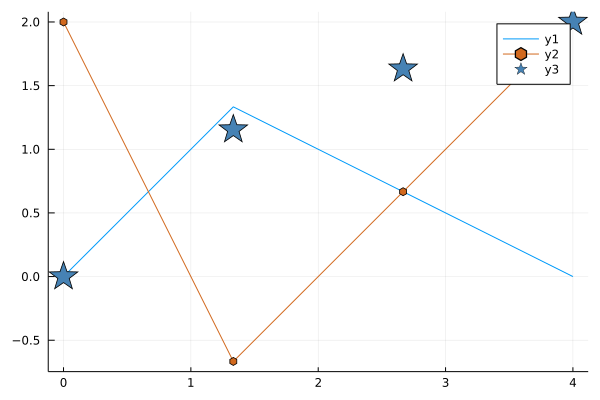

In [21]:
using Plots

x = range(0,stop=4,length=4)

y0 = mod.(x,2)
y1 = 2 .* (1 .- y0)
y2 = sqrt.(x)

plot(x, y0)  # default color is blue
plot!(x, y1, color="chocolate", marker=:hexagon)

# no lines, marker size is 15:
plot!(x, y2, color="steelblue", marker=:star, ms=15, st=:scatter)

<div class="alert alert-block alert-info">
    <i class="fa fa-info-circle"></i>&nbsp; Notice the last functions use the bang <code>!</code> operator. This is part of Julia's mechanism for applying functions in place. In this case it means you modify the last plot instead of creating a new one. Read more on: https://docs.julialang.org/en/v1/manual/style-guide/#bang-convention
</div>

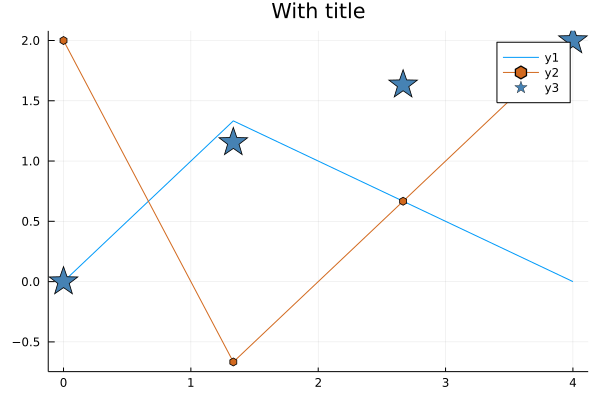

In [22]:
title!("With title")

The `Plots` library allows you to create layouts for your plots.


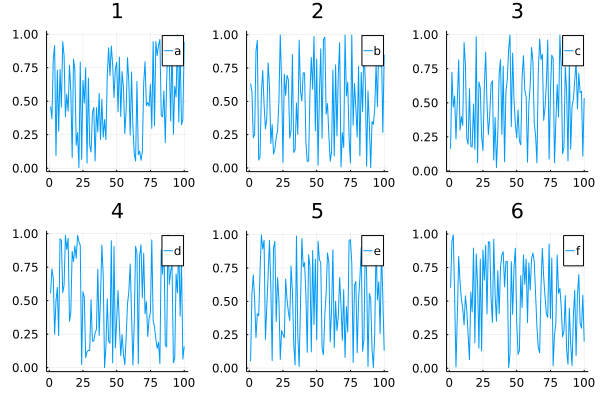

In [23]:
# multiple plots
  
plot(rand(100,6), 
    layout = 6, 
    label=["a" "b" "c" "d" "e" "f"],
    title=["1" "2" "3" "4" "5" "6"])

More advanced layouts are also possible:

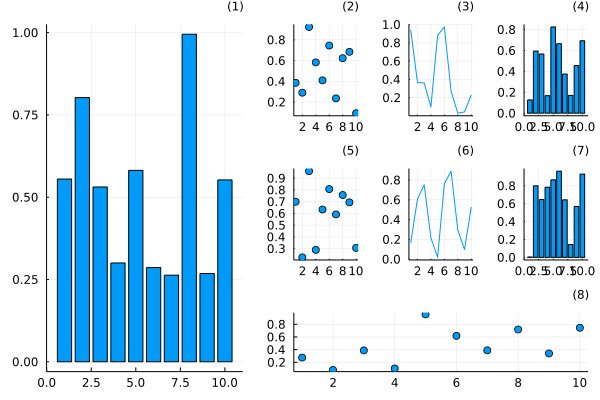

In [24]:
l = @layout [
    a{0.4w} [grid(2,3)
             b{0.2h}  ]
]
plot(
    rand(10, 8),
    layout = l, legend = false, seriestype = [:bar :scatter :path],
    title = ["($i)" for j in 1:1, i in 1:11], titleloc = :right, titlefont = font(8)
)

# R within Julia

Documentation https://juliainterop.github.io/RCall.jl/stable/gettingstarted/

Install the `RCall` package. Alternatively, install also the R datasets `RDatasets`

In [25]:
using RCall
using RDatasets

Load your favorite R libraries:

In [26]:
@rimport base as rbase
rbase.sum([1, 2, 3], var"rm.na" = true)

RObject{IntSxp}
[1] 7


## Getting R objects

Example in R: `pi`

In [27]:
R"pi"

RObject{RealSxp}
[1] 3.141593


Load data

In [28]:
iris = dataset("datasets", "iris")
first(iris, 4)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa


## Evaluating R code
Just paste your R code into the R String. 

The following code creates a `f` function and evaluates it for `3`. 

In [29]:
R"""
f <- function(r, verbose=FALSE) {
    if (verbose) {
        cat("I am calling f().\n")
    }
    2 * pi * r
}
f(3)
"""

RObject{RealSxp}
[1] 18.84956


The R function `f` is present in the R Global Environement, and can be accessed with the `rcall` function:

In [30]:
rcall(:f, 2)

RObject{RealSxp}
[1] 12.56637


In [31]:
f = @rget f # `f` is now also a julia function:
println(dump(f))

#11 (function of type RCall.var"#11#12"{RObject{ClosSxp}})
  r: RObject{ClosSxp}
    p: Ptr{ClosSxp} @0x000055c2527281d0
nothing


The function `f` is callable, and can be used like a regular Julia function.

In [32]:
res = f(1)
res

6.283185307179586

In [33]:
rcall(sum, [1 2 3 4])

RObject{IntSxp}
[1] 10
